# Regression Model in Keras

Building a Regression Model using Keras Library <br>
Classification Model Using dataset from **Heart Data UCI** <br> <br>
Our Goal is to build a classification model to predict wheather a patient is likely or unlikely to have heart disease.

## Importing Libraries and Dataset

In [1]:
from io import StringIO
import itertools
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statistics as stats
import scipy
import pydotplus

from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# Heart Disease Model - UCI
### Building a Regression Model using Keras Classification Model Using dataset from Heart Data UCI
The target of this project is to build a keras classification model and compare it with other classification model, such as Logistic Regression and Decision Tree; and optimise it to minimise error. <br>
### Heart Disease Data Set
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

feature | Value
---|---
Data Set Characteristics: | Multivariate
Attribute Characteristics: | Categorical, Integer, Real
Associated Tasks: | Classification
Number of Instances: | 303
Number of Attributes: | 75
Missing Values? | Yes
Area: | Life
Date Donated | 1988-07-01
Number of Web Hits: | 1496795

In [2]:
import tensorflow
print("TensorFlow == ", tensorflow.__version__)

import keras
print("keras == ", keras.__version__)

from keras.models import Sequential
from keras.layers import Dense

TensorFlow ==  1.15.0


Using TensorFlow backend.


keras ==  2.2.4


In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data Contains:

index|feature|description|datatype
---|---|---|---
1|**age**|in years|continuous
2|**sex**|1 = male and 0 = female|discrete
3|**cp**|chest pain type|discrete
4|**trestbps**|resting blood pressure (in mmHg on admission to the hospital)|continuous
5|**chol**|serum cholestoral in mg/dl|continuous
6|**fbs**|fasting blood sugar > 120 mg/dl (1 = true and 0 = false)|discrete
7|**restecg**|resting electrocardiographic results|discrete
8|**thalach**|maximum heart rate achieved|continuous
9|**exang**|exercise induced angina (1 = True and 0 = False)|discrete
10|**oldpeak**|ST depression induced by exercise relative to rest|continuous
11|**slope**|the slope of the peak exercise ST segment|discrete
12|**ca**|number of major vessels (0-3) colored by flourosopy|discrete
13|**thal**|(3 = normal; 6 = fixed defect; 7 = reversable defect)|discrete
14|**target**|with disease = 1 and without disease = 0|discrete

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataframe is clean and ready to be explored.

___

## Data Exploration

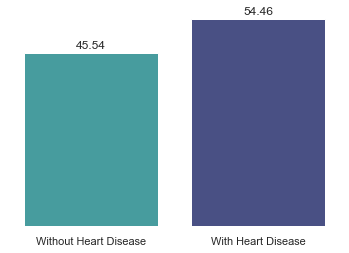

In [10]:
# Heart Disease Distribution

X1 = [round(len(df[df.target == 0])*100/len(df.target), 2), round(len(df[df.target == 1])*100/len(df.target), 2)]
Y1 = ['Without Heart Disease', 'With Heart Disease']
plot1 = sns.barplot(x = Y1, y = X1, palette = 'mako_r')
sns.set_theme(style = "white")
for bar in plot1.patches:
    plot1.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha = 'center', va = 'center', size = 12, xytext=(0, 8), textcoords='offset points')
sns.despine(left=True, bottom=True)
plt.tick_params(labelleft=False, left=False)
plt.show()

**Observation:** <br>
Dataset contains a fairly balanced set between patient with and without heart disease

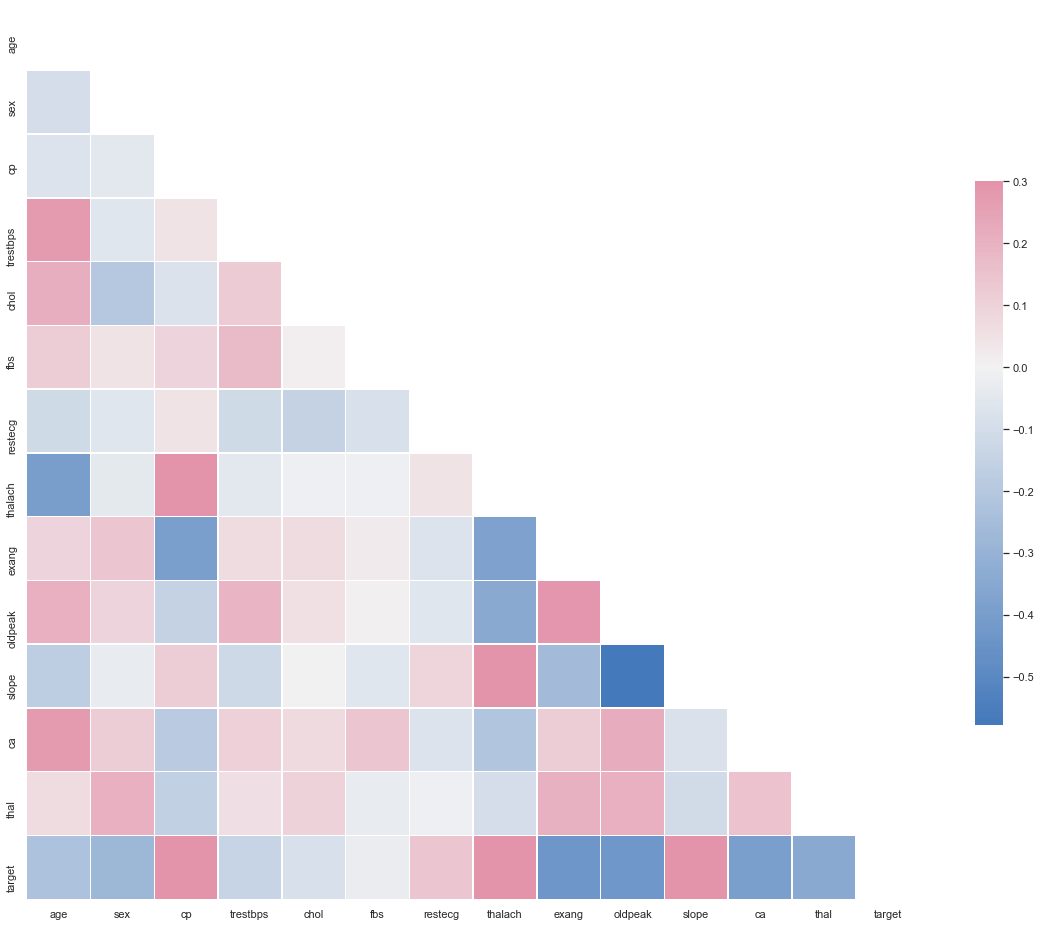

In [13]:
# Heatmap

sns.set_theme(style = "white")

corr = df.corr()     # Correlation matrix
mask = np.triu(np.ones_like(corr, dtype = bool))      # Generate mask for upper triangle

f, ax = plt.subplots(figsize = (20, 20))      # Matplotlib figure
cmap = sns.diverging_palette(250, 0, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show()

**Observation:** <br>
1. 'fbs' and 'target' has least correlation.
2. 'thalach', 'exang', 'oldpeak' has more correlation with 'target'. 

### Numerical Data vs Target

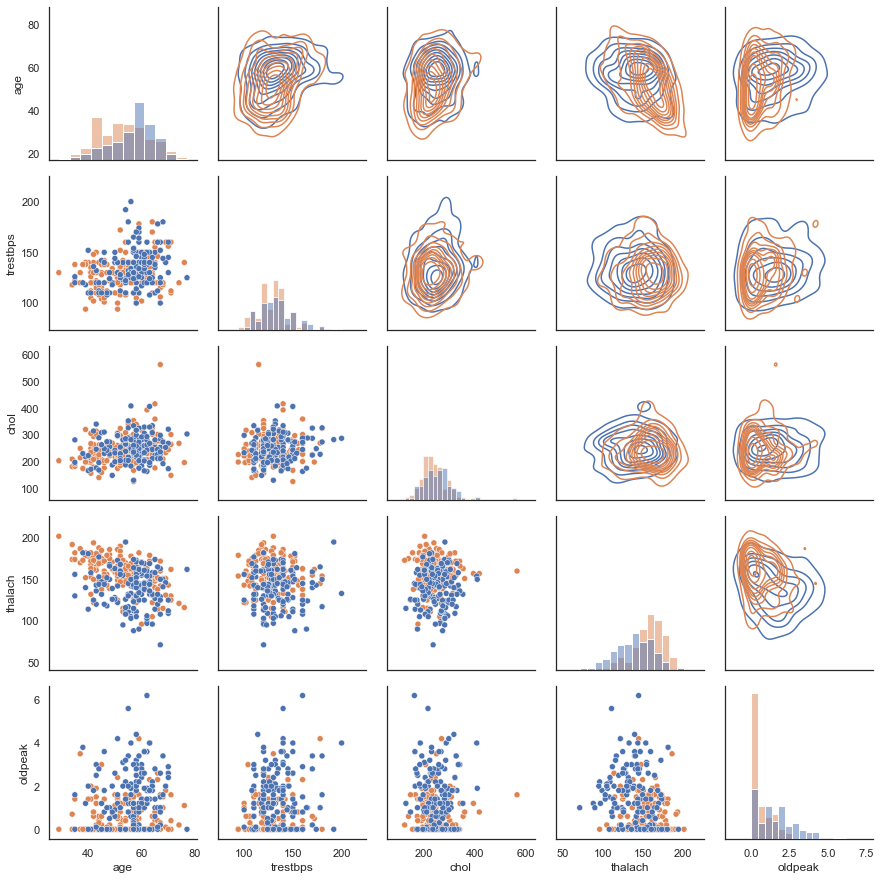

In [14]:
# Numerical Data Distribution

viz = df[["age", "trestbps", "chol", "thalach", "oldpeak", "target"]]
g = sns.PairGrid(viz, hue = "target")
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.scatterplot)
g = g.map_upper(sns.kdeplot)

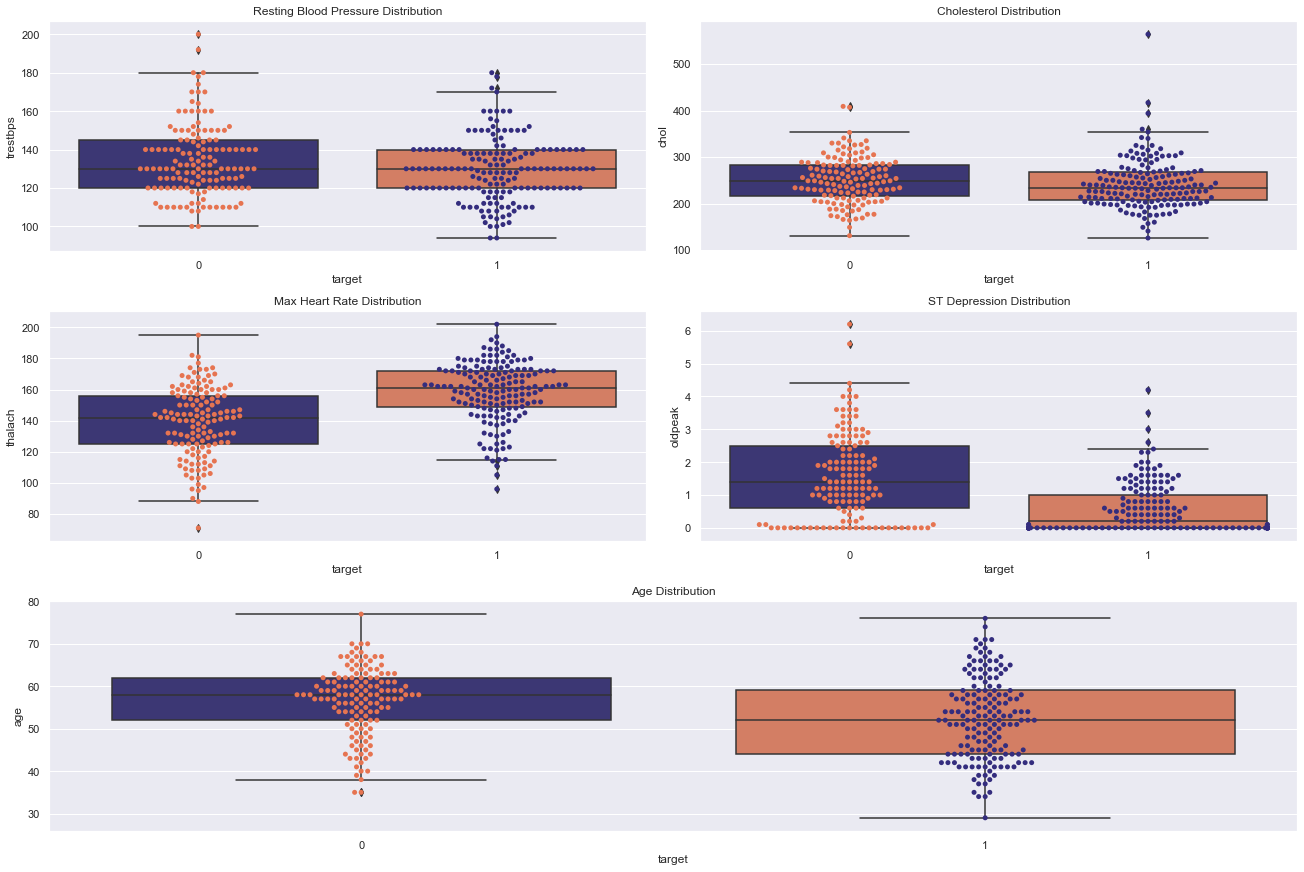

In [15]:
# Boxplot of Numerical features

fig = plt.figure(constrained_layout = True, figsize = (18, 12))
grid = gd.GridSpec(ncols = 4, nrows = 3, figure = fig)
sns.set_theme(style = "darkgrid")

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Resting Blood Pressure Distribution')
sns.boxplot(x = 'target', y = 'trestbps', data = df, palette = ['#342D7E', '#E67451'], ax = ax1)
sns.swarmplot(x = 'target', y = 'trestbps', data = df, palette = ['#E67451', '#342D7E'], ax = ax1)

ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('Cholesterol Distribution')
sns.boxplot(x = 'target', y = 'chol', data = df, palette = ['#342D7E', '#E67451'], ax = ax2)
sns.swarmplot(x ='target', y = 'chol', data = df, palette = ['#E67451', '#342D7E'], ax = ax2)

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Max Heart Rate Distribution')
sns.boxplot(x = 'target', y = 'thalach', data = df, palette = ['#342D7E', '#E67451'], ax = ax3)
sns.swarmplot(x = 'target', y = 'thalach', data = df, palette = ['#E67451', '#342D7E'], ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])
ax4.set_title('ST Depression Distribution')
sns.boxplot(x = 'target', y = 'oldpeak', data = df, palette = ['#342D7E', '#E67451'], ax = ax4)
sns.swarmplot(x = 'target', y = 'oldpeak', data = df, palette = ['#E67451', '#342D7E'], ax = ax4)

ax5 = fig.add_subplot(grid[2, :])
ax5.set_title('Age Distribution')
sns.boxplot(x = 'target', y = 'age', data = df, palette = ['#342D7E', '#E67451'], ax = ax5)
sns.swarmplot(x = 'target', y = 'age', data = df, palette = ['#E67451', '#342D7E'], ax = ax5)

plt.show()

**Observation:** <br>
1. Having higher resting blood pressure is likely to cause heart disease.
2. Higher cholesterol leads to more heart disease.
3. Contrary to conventional wisdom, higher maximum heart rate during exercise is less likely to cause heart disease.
4. Heart disease likelihood increases with ST depression levels.
5. Older patients are more likely to have heart disease.

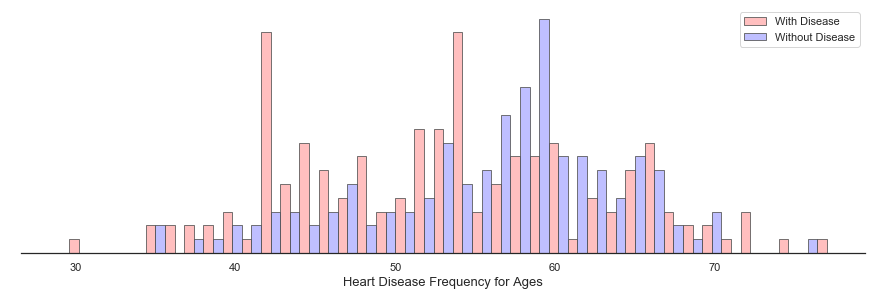

In [16]:
# Age Distribution

fig = plt.figure(constrained_layout = True, figsize = (12, 4))
sns.set_theme(style = "white")
sns.histplot(x = 'age', data = df, hue = 'target',bins = 40, multiple = 'dodge', palette = 'bwr', edgecolor = ".3")
sns.despine(left = True)
plt.tick_params(labelleft=False, left=False)
plt.legend(["With Disease", "Without Disease"])
plt.ylabel(" ")
plt.xlabel("Heart Disease Frequency for Ages", fontsize = 13)
plt.show()

**Observation:** <br>
Patients in their 40s are shown to becoming more prone to heart disease; whereas patients in their late 50s tends to be more resilient to disease. Although the model may require more data to predict accurately.

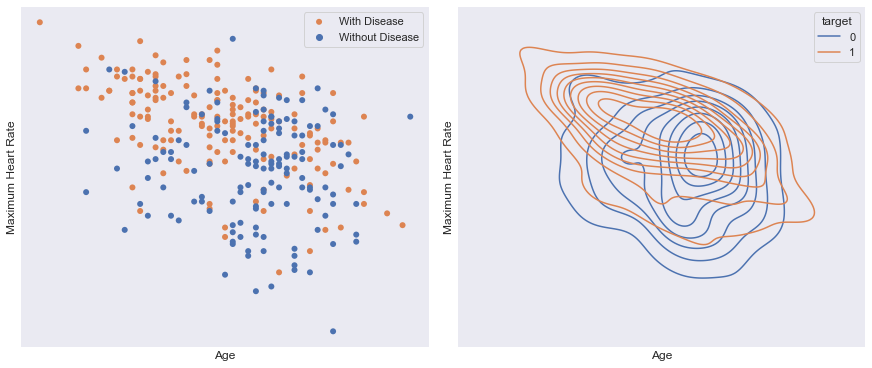

In [17]:
fig = plt.figure(constrained_layout = True, figsize = (12, 5))
grid = gd.GridSpec(ncols = 2, nrows = 1, figure = fig)
sns.set_theme(style = "dark")

ax1 = fig.add_subplot(grid[0, :1])
sns.despine(fig, left = True, bottom = True, ax = ax1)
sns.scatterplot(x = "age", y = "thalach", hue = "target", linewidth = 0, sizes = (1, 8), data = df, ax = ax1)
plt.legend(["With Disease", "Without Disease"])
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Maximum Heart Rate", fontsize = 12)
plt.tick_params(labelleft = False, left = False)
plt.tick_params(labelbottom = False, bottom = False)

ax2 = fig.add_subplot(grid[0, 1:])
sns.despine(fig, left = True, bottom = True)
sns.kdeplot(x = 'age', y = 'thalach', hue = 'target', data = df, ax = ax2)
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Maximum Heart Rate", fontsize = 12)
plt.tick_params(labelleft = False, left = False)
plt.tick_params(labelbottom = False, bottom = False)

plt.show()

**Observation:** <br>
Age and Maximum Heart Rate could be two major contributor in classifying heart diseases.

**Note:** This also suggests that a classification regression can be implemented for 'Age' and 'Max Heart Rate' feature.

### Categorical Data vs Target

In [18]:
def plotcategoricaldata(X, Y, m, n, text):
    fig = plt.figure(constrained_layout = True, figsize = (3 + n, 5))
    grid = gd.GridSpec(ncols = 2, nrows = 1, figure = fig)
    sns.set_theme(style = "dark")
    
    ax1 = fig.add_subplot(grid[0, :1])
    sns.despine(fig, left = True, bottom = True, ax = ax1)
    plot = sns.barplot(x = Y, y = X, palette = 'mako_r')
    for bar in plot.patches:
        plot.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        ha = 'center', va = 'center', size = 12, xytext = (0, 8), textcoords = 'offset points')
    sns.despine(left = True, bottom = True)
    plt.tick_params(labelleft = False, left = False)
    plt.ylim([0, 100])
    
    ax2 = fig.add_subplot(grid[0, 1:])
    sns.despine(fig, left = True, bottom = True, ax = ax2)
    sns.histplot(x = m, data = df, hue = 'target', bins = n, multiple = 'fill', palette = 'mako_r', ax = ax2)
    plt.tick_params(labelleft = False, left = False)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.legend(["With Disease", "Without Disease"])
    plt.ylabel(" ")
    plt.xlabel(text, fontsize = 13)
    
    plt.show()

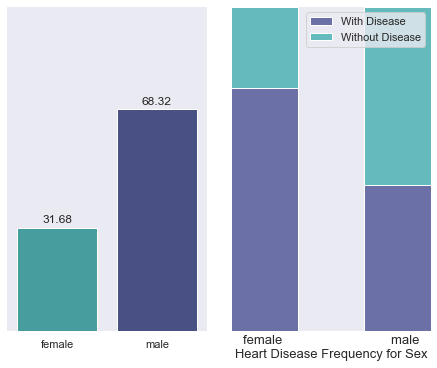

In [19]:
# Sex Distribution

X = [round(len(df[df.sex == 0])*100/len(df.sex), 2),
     round(len(df[df.sex == 1])*100/len(df.sex), 2)]
Y = ['female', 'male']
m = 'sex'
n = 3
text = 'female                              male\nHeart Disease Frequency for Sex'
plotcategoricaldata(X, Y, m, n, text)

**Observation:** <br>
The dataset consists of more male patients than female. If sex feature is major contributor to target, then we may have to use imbalanced metrics for analysis. <br>
Female are more prone to heart diseases. Hence, sex is more likely to be a major contributor.

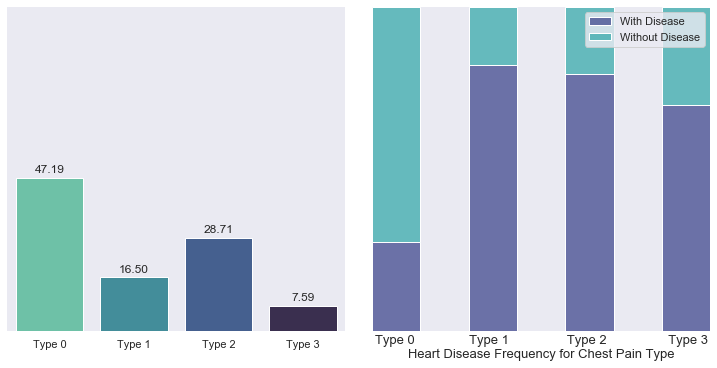

In [20]:
# Chest Pain Type Distribution

X = [round(len(df[df.cp == 0])*100/len(df.cp), 2),
     round(len(df[df.cp == 1])*100/len(df.cp), 2),
     round(len(df[df.cp == 2])*100/len(df.cp), 2),
     round(len(df[df.cp == 3])*100/len(df.cp), 2)]
Y = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
m = 'cp'
n = 7
text = 'Type 0               Type 1                Type 2                 Type 3\nHeart Disease Frequency for Chest Pain Type'
plotcategoricaldata(X, Y, m, n, text)

**Observation:** <br>
~50% of dataset is Type 0 patients but Type 3 patients fills only 8% of dataset.<br> 
People with chest pain type of 0 are less likely to heart diseases. People with chest pain type 1, 2 and 3 are more likely to contract disease.

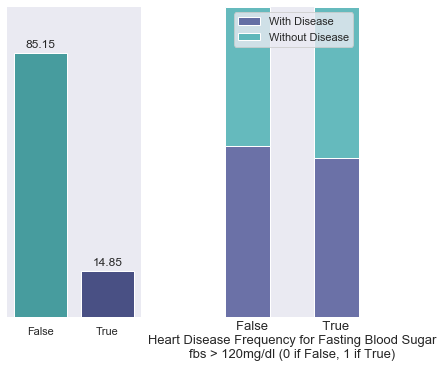

In [21]:
# Fasting Blood Sugar Distribution

X = [round(len(df[df.fbs == 0])*100/len(df.fbs), 2),
     round(len(df[df.fbs == 1])*100/len(df.fbs), 2)]
Y = ['False', 'True']
m = 'fbs'
n = 3
text = 'False               True\nHeart Disease Frequency for Fasting Blood Sugar\nfbs > 120mg/dl (0 if False, 1 if True)'
plotcategoricaldata(X, Y, m, n, text)

**Observation:** <br>
Fasting Blood Sugar > 120 mg/dl is slightly less likely to get disease.

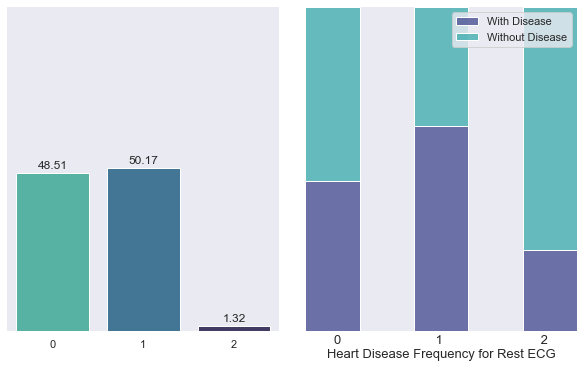

In [22]:
# Resting Electrocardiographic Distribution

X = [round(len(df[df.restecg == 0])*100/len(df.restecg), 2),
     round(len(df[df.restecg == 1])*100/len(df.restecg), 2),
     round(len(df[df.restecg == 2])*100/len(df.restecg), 2)]
Y = ['0', '1', '2']
m = 'restecg'
n = 5
text = '0                          1                           2\nHeart Disease Frequency for Rest ECG'
plotcategoricaldata(X, Y, m, n, text)

**Observations:**<br>Patients with type 1 Rest ECG are more likely to have heart disease.

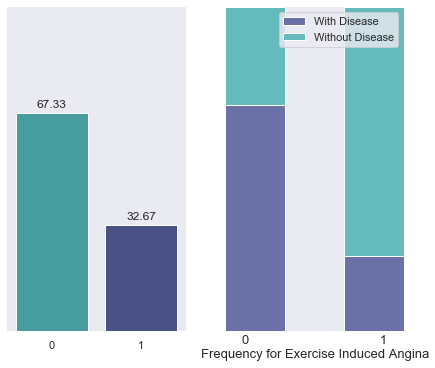

In [23]:
# Exercise Induced Angina Distribution

X = [round(len(df[df.exang == 0])*100/len(df.exang), 2),
     round(len(df[df.exang == 1])*100/len(df.exang), 2)]
Y = ['0', '1']
m = 'exang'
n = 3
text = '0                                    1\nFrequency for Exercise Induced Angina'
plotcategoricaldata(X, Y, m, n, text)

**Observations:**<br>Patients with exercise induced angina are less likely to have heart disease.

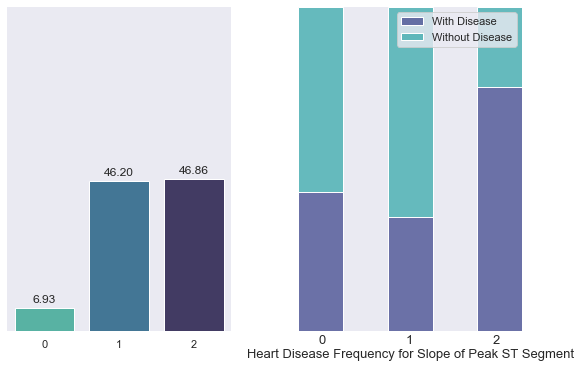

In [24]:
# Slope of ST egment DIstribution

X = [round(len(df[df.slope == 0])*100/len(df.slope), 2),
     round(len(df[df.slope == 1])*100/len(df.slope), 2),
     round(len(df[df.slope == 2])*100/len(df.slope), 2)]
Y = ['0', '1', '2']
m = 'slope'
n = 5
text = '0                      1                      2\nHeart Disease Frequency for Slope of Peak ST Segment'
plotcategoricaldata(X, Y, m, n, text)

**Observation:** <br>
Slope of the Peak Exercise ST Segmant is major contributor in disease.

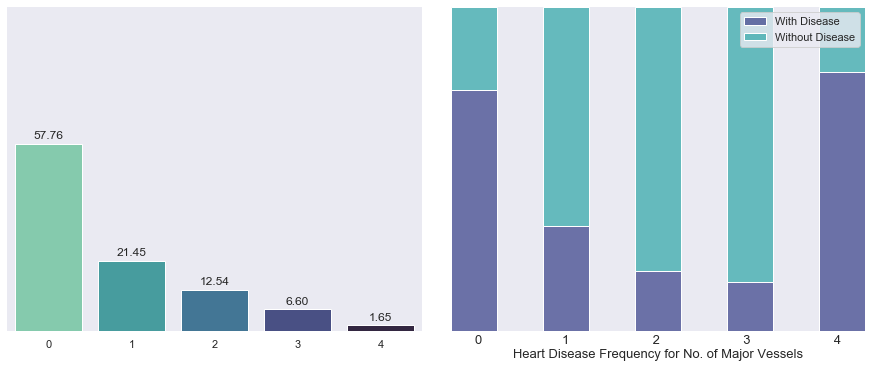

In [25]:
# Number of Major Vessels Distribution

X = [round(len(df[df.ca == 0])*100/len(df.ca), 2),
     round(len(df[df.ca == 1])*100/len(df.ca), 2),
     round(len(df[df.ca == 2])*100/len(df.ca), 2),
     round(len(df[df.ca == 3])*100/len(df.ca), 2),
     round(len(df[df.ca == 4])*100/len(df.ca), 2)]
Y = ['0', '1', '2', '3', '4']
m = 'ca'
n = 9
text = '0                      1                       2                       3                       4\nHeart Disease Frequency for No. of Major Vessels'
plotcategoricaldata(X, Y, m, n, text)

**Observation:** <br>
Having 1, 2 or 3 major vessels leads less heart disease.

___

## Model Building

### Preprocessing

In [93]:
y = df.target.values
X = df.drop(['target'], axis = 1)

X = preprocessing.StandardScaler().fit(X).transform(X)

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


## Logistic Regression

In [94]:
# Fit Logistic Regression Object
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train,y_train)
print(LR)

LogisticRegression(C=0.01, solver='liblinear')


In [95]:
# Predict Model
yhat_LR = LR.predict(x_test)
yhat_LR

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

### Evaluation

In [96]:
# Mean Squared Error
y_1 = mean_squared_error(y_test, yhat_LR)

print("\nMean Squared Error of Logistic Regression Model = ", y_1)


Mean Squared Error of Logistic Regression Model =  0.11475409836065574


In [97]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33  3]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



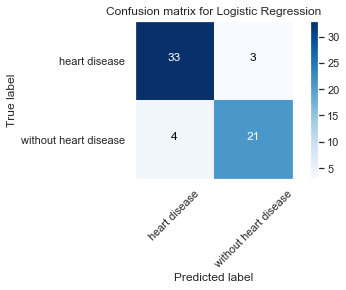

In [98]:
# Compute confusion matrix
cnf_matrix_LR = confusion_matrix(y_test, yhat_LR, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes = ['heart disease', 'without heart disease'],
                      normalize = False,  title = 'Confusion matrix for Logistic Regression')

print (classification_report(y_test, yhat_LR))

## Dicision Tree

In [99]:
# Fit Decision Tree Object
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [100]:
# Model Predict
predTree = Tree.predict(x_test)
predTree

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

### Evaluation

In [101]:
# Mean Squared Error
y_2 = mean_squared_error(y_test, predTree)

print("\nMean Squared Error of Decision Tree Model = ", y_2)


Mean Squared Error of Decision Tree Model =  0.14754098360655737


Confusion matrix, without normalization
[[33  3]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



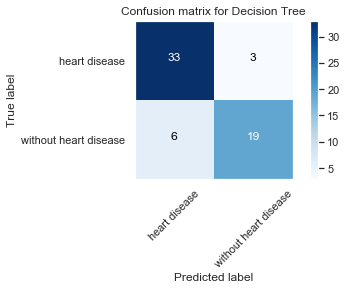

In [102]:
# Compute confusion matrix
cnf_matrix_tree = confusion_matrix(y_test, predTree, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_tree, classes = ['heart disease', 'without heart disease'],
                      normalize = False,  title = 'Confusion matrix for Decision Tree')

print (classification_report(y_test, predTree))

### Visualisation

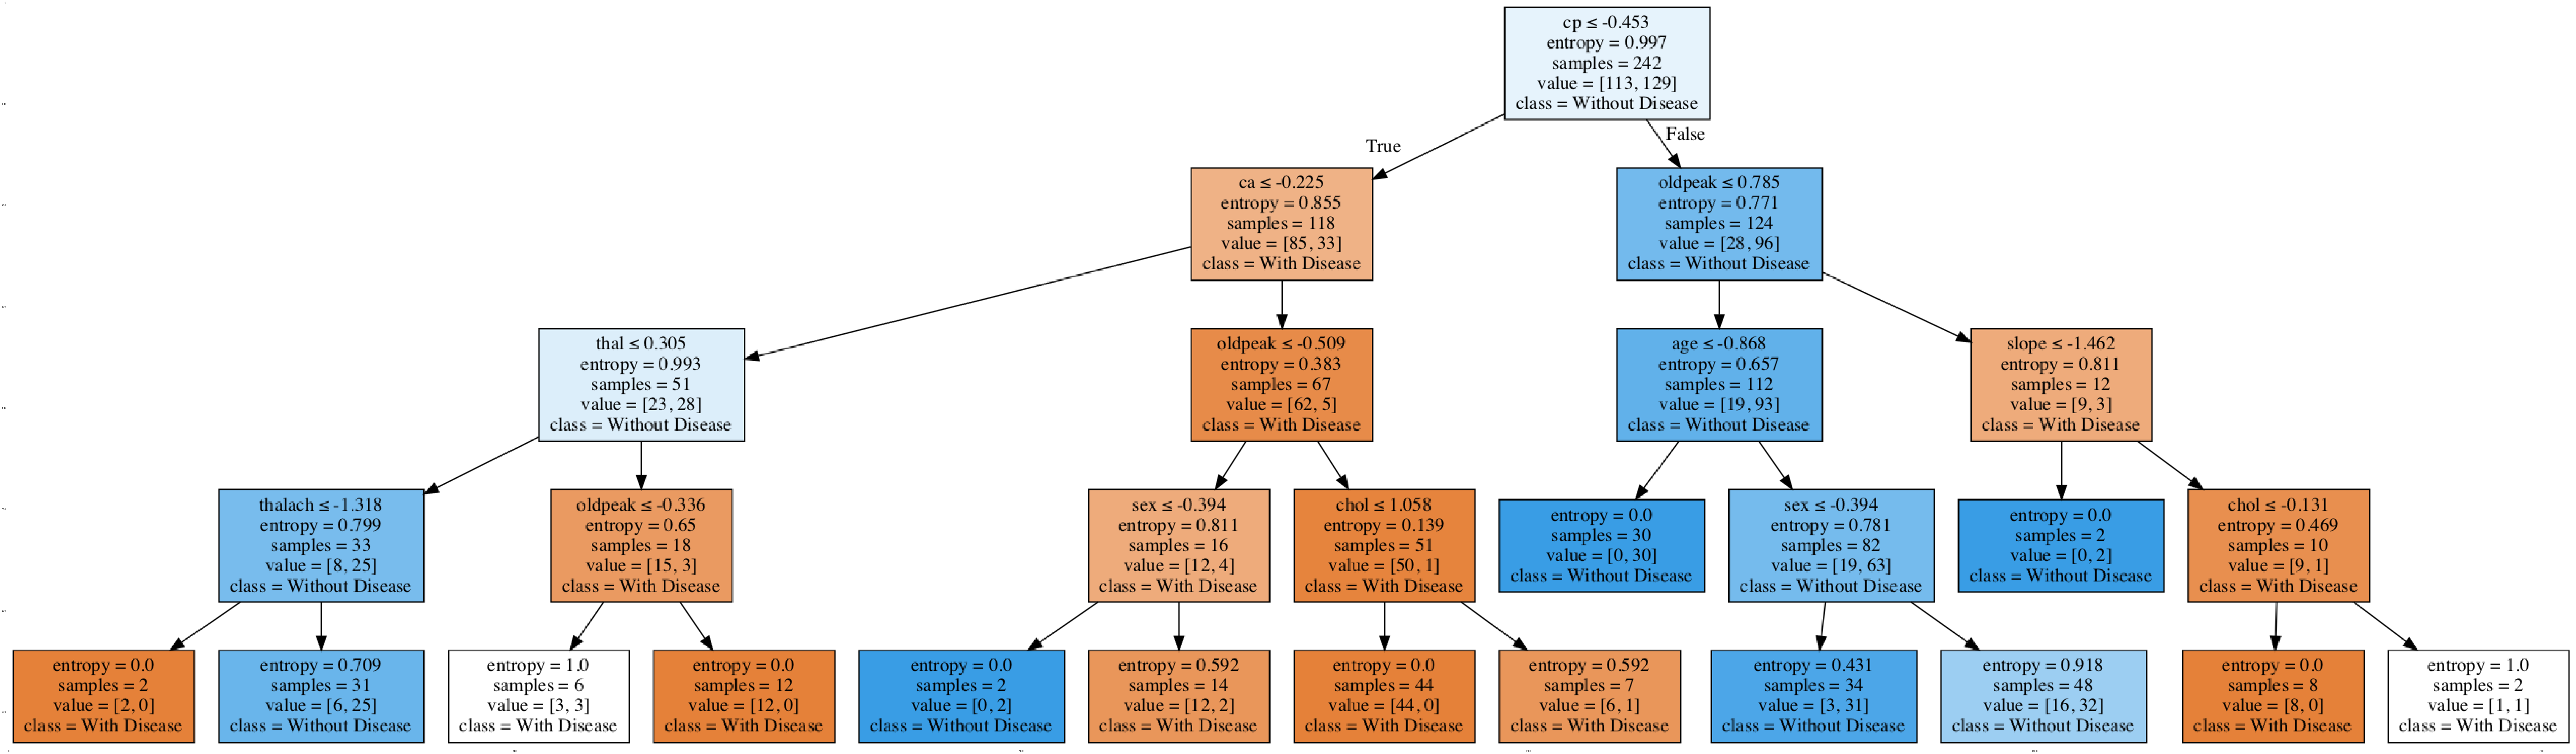

In [103]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:13]
targetNames = df["target"].unique().tolist()

out = tree.export_graphviz(Tree,feature_names = featureNames, out_file = dot_data,
                           class_names =  (["With Disease", "Without Disease"]), filled = True,
                           special_characters = True, rotate = False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (200, 400))
plt.imshow(img, interpolation = 'nearest')
plt.show()

___

## Neural Network Model Building

### Building Neural Network with Keras

In this model we will implement the entire dataset in a Neural Network to target heart disease. The model contains: <br>
1. Feature vector with 22 units
2. Input layer with 10 nodes
3. 1 hidden layer with 10 nodes
4. 1 output node <br>

The model will use **'relu'** activator; **'adam'** optimizer and **'mean_squared_error'** loss function in 100 epochs.

In [110]:
model_5 = Sequential()
model_5.add(Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
model_5.add(Dense(10, activation = 'relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

model_5.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mean_squared_error"])

model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


**Fit Regression Model**

In [111]:
history_5 = model_5.fit(x_train, y_train, validation_split = 0.3, epochs = 150)

Train on 169 samples, validate on 73 samples
Epoch 1/150
169/169 [==============================] - 2s 9ms/step - loss: 0.3716 - mean_squared_error: 0.3716 - val_loss: 0.3669 - val_mean_squared_error: 0.3669
Epoch 2/150
169/169 [==============================] - 0s 139us/step - loss: 0.3593 - mean_squared_error: 0.3593 - val_loss: 0.3571 - val_mean_squared_error: 0.3571
Epoch 3/150
169/169 [==============================] - 0s 200us/step - loss: 0.3486 - mean_squared_error: 0.3486 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 4/150
169/169 [==============================] - 0s 121us/step - loss: 0.3367 - mean_squared_error: 0.3367 - val_loss: 0.3370 - val_mean_squared_error: 0.3370
Epoch 5/150
169/169 [==============================] - 0s 141us/step - loss: 0.3263 - mean_squared_error: 0.3263 - val_loss: 0.3279 - val_mean_squared_error: 0.3279
Epoch 6/150
169/169 [==============================] - 0s 118us/step - loss: 0.3161 - mean_squared_error: 0.3161 - val_loss: 0.3186 

169/169 [==============================] - 0s 98us/step - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 100/150
169/169 [==============================] - 0s 148us/step - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 101/150
169/169 [==============================] - 0s 154us/step - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 102/150
169/169 [==============================] - 0s 159us/step - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 103/150
169/169 [==============================] - 0s 141us/step - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 104/150
169/169 [==============================] - 0s 159us/step - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 105/150

## Model Evaluation

In [112]:
f1_train = f1_score(y_train, np.around(model_5.predict(x_train)))
f1_test = f1_score(y_test, np.around(model_5.predict(x_test)))

print("F1 score on trainset = ", f1_train)
print("F1 score on testset = ", f1_test)

F1 score on trainset =  0.8973384030418251
F1 score on testset =  0.9066666666666667


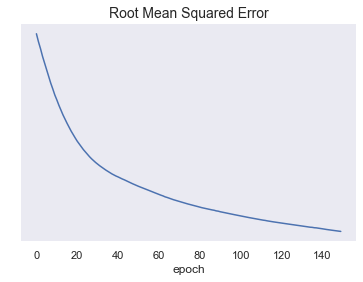

In [113]:
plt.plot(history_5.history['mean_squared_error'])
sns.despine(left = True, bottom = True)
sns.set_theme(style = "dark")
plt.tick_params(labelleft=False, left=False)
plt.title('Root Mean Squared Error', fontsize = 14)
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.ylabel(' ')
plt.show()

**Observation: Model is highly optimised in 20 epochs**

## Test Accuracy

In [114]:
mse_train = mean_squared_error(y_train, model_5.predict(x_train))
mse_test = mean_squared_error(y_test, model_5.predict(x_test))

print("Training Set Accuracy = ", 100 - mse_train*100)
print("Testing Set Accuracy = ", 100 - mse_test*100)

Training Set Accuracy =  91.24386315761784
Testing Set Accuracy =  91.2758759185397


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



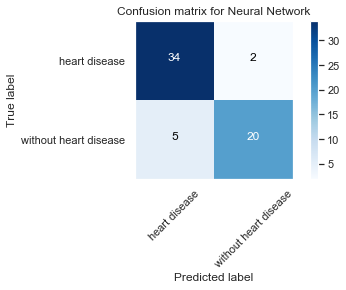

In [115]:
# Convert test data
y_pred_test = np.around(model_5.predict(x_test))

# Compute confusion matrix
cnf_matrix_nn = confusion_matrix(y_test, y_pred_test, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_nn, classes = ['heart disease', 'without heart disease'],
                      normalize = False,  title = 'Confusion matrix for Neural Network')

print (classification_report(y_test, y_pred_test))

## Learning Curves

In [116]:
history_dict = history_5.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_ = history_dict['mean_squared_error']
val_accuracy_ = history_dict['val_mean_squared_error']

accuracy = []
val_accuracy = []
for i in range(len(accuracy_)):
    accuracy.append(1 - accuracy_[i])
    val_accuracy.append(1 - val_accuracy_[i])

epochs = range(1, len(loss_values) + 1)

**Plot the model Accuracy-vs-Epochs and Loss-vs-Epoch**

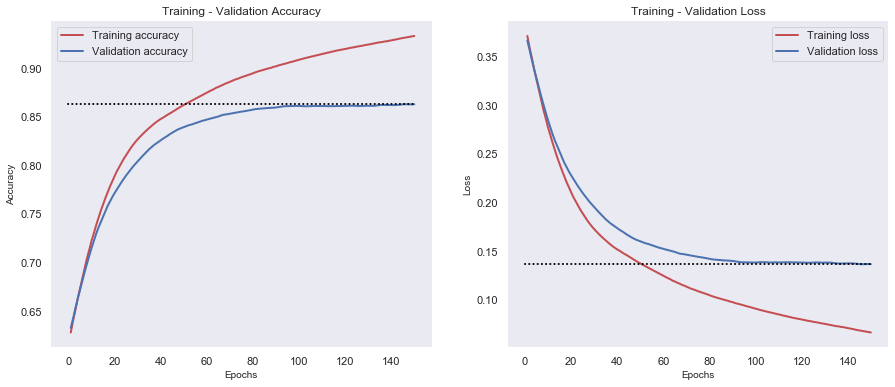

In [118]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.set_theme(style = "dark")
x_dot = [0, 150]
y_dot_accuracy = [max(val_accuracy), max(val_accuracy)]
y_dot_loss = [min(val_loss_values), min(val_loss_values)]

ax[0].plot(epochs, accuracy, 'r', label = 'Training accuracy', linewidth = 2)
ax[0].plot(epochs, val_accuracy, 'b', label = 'Validation accuracy', linewidth = 2)
ax[0].plot(x_dot, y_dot_accuracy, linestyle = (0,(0.1,2)), dash_capstyle = 'round', linewidth = 2, color = 'Black')
ax[0].set_title('Training - Validation Accuracy', fontsize=12)
ax[0].set_xlabel('Epochs', fontsize = 10)
ax[0].set_ylabel('Accuracy', fontsize = 10)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].legend()

ax[1].plot(epochs, loss_values, 'r', label = 'Training loss', linewidth = 2) 
ax[1].plot(epochs, val_loss_values, 'b', label = 'Validation loss', linewidth = 2)
ax[1].plot(x_dot, y_dot_loss, linestyle = (0,(0.1,2)), dash_capstyle = 'round', linewidth = 2, color = 'Black')
ax[1].set_title('Training - Validation Loss', fontsize = 12)
ax[1].set_xlabel('Epochs', fontsize = 10)
ax[1].set_ylabel('Loss', fontsize = 10)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].legend()

plt.show()

**Observation:** <br>
This Neural Network suffers from high varience although rate of decay of accuracy in low. Stoping at 60 epochs results better accuracy. <br>
Most noticable problem is lack of training examples. Which can be overcome by training 50 models and taking average metrics.

In [ ]:
model.save('heart_disease_trained.h5')

print("...model saved")

## Model Training with 50 models

**Train 50 models** <br>
To iterate model training 50 times and to calculate mean $(\mu)$ and standard deviation $(\sigma)$ :
1. Create empty list *mse_list* to store the mse values obtained after every iteration
2. Loop through the model 50 times:
  * Randomly split x_data and y into train test dataset
  * Use train dataset to train model
  * Use test dataset to predict y
  * Calculate mse for each iteration and populate *mse_list*
3. Calculate mean $(\mu)$ and standard deviation $(\sigma)$ from *mse_list*

In [119]:
def regression_model():
    model_m = Sequential()
    model_m.add(Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
    model_m.add(Dense(10, activation = 'relu'))
    model_m.add(Dense(1, activation = 'sigmoid'))

    model_m.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mean_squared_error"])
    
    return model_m

In [120]:
mse_list_train = []
mse_list_test = []

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
    
    # Train and fit model
    model_m = regression_model()
    print('\n\n\nTraining Model # ' , i+1 , '\n\n')
    model_m.fit(x_train, y_train, validation_split = 0.3, epochs = 150)
    print('\n')
    
    # Prediction and evaluation
    mse_train = mean_squared_error(y_train, model_m.predict(x_train))
    mse_test = mean_squared_error(y_test, model_m.predict(x_test))
    print('\nMSE on Train Set for Training Model #', i+1 , ' = ', mse_train)
    print('\nMSE on Test Set for Training Model #', i+1 , ' = ', mse_test)

    print("\n", classification_report(y_test, np.around(model_m.predict(x_test))))
    
    # Append mse to mse_list
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)




Training Model #  1 


Train on 169 samples, validate on 73 samples
Epoch 1/150
169/169 [==============================] - 1s 9ms/step - loss: 0.2416 - mean_squared_error: 0.2416 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 2/150
169/169 [==============================] - 0s 120us/step - loss: 0.2346 - mean_squared_error: 0.2346 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 3/150
169/169 [==============================] - 0s 159us/step - loss: 0.2285 - mean_squared_error: 0.2285 - val_loss: 0.2159 - val_mean_squared_error: 0.2159
Epoch 4/150
169/169 [==============================] - 0s 163us/step - loss: 0.2229 - mean_squared_error: 0.2229 - val_loss: 0.2101 - val_mean_squared_error: 0.2101
Epoch 5/150
169/169 [==============================] - 0s 147us/step - loss: 0.2177 - mean_squared_error: 0.2177 - val_loss: 0.2047 - val_mean_squared_error: 0.2047
Epoch 6/150
169/169 [==============================] - 0s 119us/step - loss: 0.2127 - mean_squared_error: 

Epoch 50/150
169/169 [==============================] - 0s 163us/step - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.1055 - val_mean_squared_error: 0.1055
Epoch 51/150
169/169 [==============================] - 0s 129us/step - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 52/150
169/169 [==============================] - 0s 132us/step - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.1049 - val_mean_squared_error: 0.1049
Epoch 53/150
169/169 [==============================] - 0s 118us/step - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 54/150
169/169 [==============================] - 0s 156us/step - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 55/150
169/169 [==============================] - 0s 140us/step - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.1041 - val_mean_squared_error: 0.1041
Epoc

169/169 [==============================] - 0s 147us/step - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1126 - val_mean_squared_error: 0.1126
Epoch 149/150
169/169 [==============================] - 0s 159us/step - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1127 - val_mean_squared_error: 0.1127
Epoch 150/150
169/169 [==============================] - 0s 188us/step - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.1128 - val_mean_squared_error: 0.1128



MSE on Train Set for Training Model # 1  =  0.0810315839835203

MSE on Test Set for Training Model # 1  =  0.08965643146593406

               precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.92      0.92      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61




Training Model #  2 


Train on 169 samples, valida

Epoch 44/150
169/169 [==============================] - 0s 138us/step - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.1537 - val_mean_squared_error: 0.1537
Epoch 45/150
169/169 [==============================] - 0s 132us/step - loss: 0.1290 - mean_squared_error: 0.1290 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 46/150
169/169 [==============================] - 0s 194us/step - loss: 0.1281 - mean_squared_error: 0.1281 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 47/150
169/169 [==============================] - 0s 181us/step - loss: 0.1274 - mean_squared_error: 0.1274 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 48/150
169/169 [==============================] - 0s 165us/step - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1511 - val_mean_squared_error: 0.1511
Epoch 49/150
169/169 [==============================] - 0s 197us/step - loss: 0.1258 - mean_squared_error: 0.1258 - val_loss: 0.1507 - val_mean_squared_error: 0.1507
Epoc

169/169 [==============================] - 0s 140us/step - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 143/150
169/169 [==============================] - 0s 179us/step - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.1484 - val_mean_squared_error: 0.1484
Epoch 144/150
169/169 [==============================] - 0s 158us/step - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 145/150
169/169 [==============================] - 0s 185us/step - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.1487 - val_mean_squared_error: 0.1487
Epoch 146/150
169/169 [==============================] - 0s 137us/step - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.1484 - val_mean_squared_error: 0.1484
Epoch 147/150
169/169 [==============================] - 0s 120us/step - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1484 - val_mean_squared_error: 0.1484
Epoch 148/15

169/169 [==============================] - 0s 140us/step - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.1562 - val_mean_squared_error: 0.1562
Epoch 88/150
169/169 [==============================] - 0s 164us/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 89/150
169/169 [==============================] - 0s 184us/step - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 90/150
169/169 [==============================] - 0s 187us/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 91/150
169/169 [==============================] - 0s 169us/step - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.1558 - val_mean_squared_error: 0.1558
Epoch 92/150
169/169 [==============================] - 0s 179us/step - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.1555 - val_mean_squared_error: 0.1555
Epoch 93/150
169/

169/169 [==============================] - 0s 152us/step - loss: 0.1393 - mean_squared_error: 0.1393 - val_loss: 0.1184 - val_mean_squared_error: 0.1184
Epoch 33/150
169/169 [==============================] - 0s 142us/step - loss: 0.1378 - mean_squared_error: 0.1378 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 34/150
169/169 [==============================] - 0s 148us/step - loss: 0.1363 - mean_squared_error: 0.1363 - val_loss: 0.1178 - val_mean_squared_error: 0.1178
Epoch 35/150
169/169 [==============================] - 0s 146us/step - loss: 0.1352 - mean_squared_error: 0.1352 - val_loss: 0.1175 - val_mean_squared_error: 0.1175
Epoch 36/150
169/169 [==============================] - 0s 173us/step - loss: 0.1338 - mean_squared_error: 0.1338 - val_loss: 0.1175 - val_mean_squared_error: 0.1175
Epoch 37/150
169/169 [==============================] - 0s 185us/step - loss: 0.1326 - mean_squared_error: 0.1326 - val_loss: 0.1175 - val_mean_squared_error: 0.1175
Epoch 38/150
169/

169/169 [==============================] - 0s 164us/step - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.1231 - val_mean_squared_error: 0.1231
Epoch 130/150
169/169 [==============================] - 0s 144us/step - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 131/150
169/169 [==============================] - 0s 153us/step - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 132/150
169/169 [==============================] - 0s 153us/step - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 133/150
169/169 [==============================] - 0s 145us/step - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.1225 - val_mean_squared_error: 0.1225
Epoch 134/150
169/169 [==============================] - 0s 172us/step - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.1228 - val_mean_squared_error: 0.1228
Epoch 135/15

169/169 [==============================] - 0s 154us/step - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 75/150
169/169 [==============================] - 0s 162us/step - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.1199 - val_mean_squared_error: 0.1199
Epoch 76/150
169/169 [==============================] - 0s 138us/step - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.1199 - val_mean_squared_error: 0.1199
Epoch 77/150
169/169 [==============================] - 0s 133us/step - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 78/150
169/169 [==============================] - 0s 151us/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 79/150
169/169 [==============================] - 0s 324us/step - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 80/150
169/

169/169 [==============================] - 0s 151us/step - loss: 0.1919 - mean_squared_error: 0.1919 - val_loss: 0.1896 - val_mean_squared_error: 0.1896
Epoch 20/150
169/169 [==============================] - 0s 161us/step - loss: 0.1874 - mean_squared_error: 0.1874 - val_loss: 0.1867 - val_mean_squared_error: 0.1867
Epoch 21/150
169/169 [==============================] - 0s 177us/step - loss: 0.1830 - mean_squared_error: 0.1830 - val_loss: 0.1836 - val_mean_squared_error: 0.1836
Epoch 22/150
169/169 [==============================] - 0s 159us/step - loss: 0.1792 - mean_squared_error: 0.1792 - val_loss: 0.1807 - val_mean_squared_error: 0.1807
Epoch 23/150
169/169 [==============================] - 0s 175us/step - loss: 0.1752 - mean_squared_error: 0.1752 - val_loss: 0.1779 - val_mean_squared_error: 0.1779
Epoch 24/150
169/169 [==============================] - 0s 159us/step - loss: 0.1718 - mean_squared_error: 0.1718 - val_loss: 0.1753 - val_mean_squared_error: 0.1753
Epoch 25/150
169/

169/169 [==============================] - 0s 141us/step - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 118/150
169/169 [==============================] - 0s 168us/step - loss: 0.0872 - mean_squared_error: 0.0872 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 119/150
169/169 [==============================] - 0s 185us/step - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 120/150
169/169 [==============================] - 0s 154us/step - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 121/150
169/169 [==============================] - 0s 176us/step - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 122/150
169/169 [==============================] - 0s 149us/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 123/15

169/169 [==============================] - 0s 129us/step - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.1150 - val_mean_squared_error: 0.1150
Epoch 63/150
169/169 [==============================] - 0s 139us/step - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.1150 - val_mean_squared_error: 0.1150
Epoch 64/150
169/169 [==============================] - 0s 136us/step - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.1146 - val_mean_squared_error: 0.1146
Epoch 65/150
169/169 [==============================] - 0s 128us/step - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.1143 - val_mean_squared_error: 0.1143
Epoch 66/150
169/169 [==============================] - 0s 137us/step - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.1142 - val_mean_squared_error: 0.1142
Epoch 67/150
169/169 [==============================] - 0s 168us/step - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.1139 - val_mean_squared_error: 0.1139
Epoch 68/150
169/

169/169 [==============================] - 0s 184us/step - loss: 0.2387 - mean_squared_error: 0.2387 - val_loss: 0.2432 - val_mean_squared_error: 0.2432
Epoch 8/150
169/169 [==============================] - 0s 201us/step - loss: 0.2352 - mean_squared_error: 0.2352 - val_loss: 0.2397 - val_mean_squared_error: 0.2397
Epoch 9/150
169/169 [==============================] - 0s 206us/step - loss: 0.2319 - mean_squared_error: 0.2319 - val_loss: 0.2360 - val_mean_squared_error: 0.2360
Epoch 10/150
169/169 [==============================] - 0s 221us/step - loss: 0.2286 - mean_squared_error: 0.2286 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 11/150
169/169 [==============================] - 0s 232us/step - loss: 0.2253 - mean_squared_error: 0.2253 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 12/150
169/169 [==============================] - 0s 120us/step - loss: 0.2221 - mean_squared_error: 0.2221 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 13/150
169/16

169/169 [==============================] - 0s 149us/step - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.1332 - val_mean_squared_error: 0.1332
Epoch 106/150
169/169 [==============================] - 0s 172us/step - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.1331 - val_mean_squared_error: 0.1331
Epoch 107/150
169/169 [==============================] - 0s 155us/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 108/150
169/169 [==============================] - 0s 136us/step - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 109/150
169/169 [==============================] - 0s 142us/step - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 110/150
169/169 [==============================] - 0s 132us/step - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 111/15

169/169 [==============================] - 2s 15ms/step - loss: 0.2750 - mean_squared_error: 0.2750 - val_loss: 0.2616 - val_mean_squared_error: 0.2616
Epoch 2/150
169/169 [==============================] - 0s 110us/step - loss: 0.2645 - mean_squared_error: 0.2645 - val_loss: 0.2520 - val_mean_squared_error: 0.2520
Epoch 3/150
169/169 [==============================] - 0s 136us/step - loss: 0.2553 - mean_squared_error: 0.2553 - val_loss: 0.2425 - val_mean_squared_error: 0.2425
Epoch 4/150
169/169 [==============================] - 0s 128us/step - loss: 0.2471 - mean_squared_error: 0.2471 - val_loss: 0.2337 - val_mean_squared_error: 0.2337
Epoch 5/150
169/169 [==============================] - 0s 154us/step - loss: 0.2394 - mean_squared_error: 0.2394 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 6/150
169/169 [==============================] - 0s 219us/step - loss: 0.2324 - mean_squared_error: 0.2324 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 7/150
169/169 [==

169/169 [==============================] - 0s 162us/step - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 100/150
169/169 [==============================] - 0s 168us/step - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 101/150
169/169 [==============================] - 0s 160us/step - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 102/150
169/169 [==============================] - 0s 156us/step - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 103/150
169/169 [==============================] - 0s 174us/step - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 104/150
169/169 [==============================] - 0s 165us/step - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 105/15

169/169 [==============================] - 0s 172us/step - loss: 0.1309 - mean_squared_error: 0.1309 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 45/150
169/169 [==============================] - 0s 178us/step - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 46/150
169/169 [==============================] - 0s 177us/step - loss: 0.1290 - mean_squared_error: 0.1290 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 47/150
169/169 [==============================] - 0s 167us/step - loss: 0.1282 - mean_squared_error: 0.1282 - val_loss: 0.1305 - val_mean_squared_error: 0.1305
Epoch 48/150
169/169 [==============================] - 0s 163us/step - loss: 0.1274 - mean_squared_error: 0.1274 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 49/150
169/169 [==============================] - 0s 182us/step - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 50/150
169/

Epoch 142/150
169/169 [==============================] - 0s 139us/step - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 143/150
169/169 [==============================] - 0s 175us/step - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 144/150
169/169 [==============================] - 0s 153us/step - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 145/150
169/169 [==============================] - 0s 179us/step - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 146/150
169/169 [==============================] - 0s 148us/step - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 147/150
169/169 [==============================] - 0s 202us/step - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.1281 - val_mean_squared_error: 0.128

169/169 [==============================] - 0s 141us/step - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.1114 - val_mean_squared_error: 0.1114
Epoch 88/150
169/169 [==============================] - 0s 187us/step - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.1114 - val_mean_squared_error: 0.1114
Epoch 89/150
169/169 [==============================] - 0s 168us/step - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 90/150
169/169 [==============================] - 0s 175us/step - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.1111 - val_mean_squared_error: 0.1111
Epoch 91/150
169/169 [==============================] - 0s 181us/step - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 92/150
169/169 [==============================] - 0s 137us/step - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 93/150
169/

169/169 [==============================] - 0s 153us/step - loss: 0.1330 - mean_squared_error: 0.1330 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 33/150
169/169 [==============================] - 0s 163us/step - loss: 0.1316 - mean_squared_error: 0.1316 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 34/150
169/169 [==============================] - 0s 151us/step - loss: 0.1301 - mean_squared_error: 0.1301 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 35/150
169/169 [==============================] - 0s 161us/step - loss: 0.1288 - mean_squared_error: 0.1288 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 36/150
169/169 [==============================] - 0s 143us/step - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 37/150
169/169 [==============================] - 0s 150us/step - loss: 0.1265 - mean_squared_error: 0.1265 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 38/150
169/

169/169 [==============================] - 0s 159us/step - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.1099 - val_mean_squared_error: 0.1099
Epoch 131/150
169/169 [==============================] - 0s 146us/step - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 132/150
169/169 [==============================] - 0s 156us/step - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.1107 - val_mean_squared_error: 0.1107
Epoch 133/150
169/169 [==============================] - 0s 161us/step - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 134/150
169/169 [==============================] - 0s 137us/step - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.1112 - val_mean_squared_error: 0.1112
Epoch 135/150
169/169 [==============================] - 0s 163us/step - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.1115 - val_mean_squared_error: 0.1115
Epoch 136/15

169/169 [==============================] - 0s 208us/step - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 76/150
169/169 [==============================] - ETA: 0s - loss: 0.1458 - mean_squared_error: 0.14 - 0s 196us/step - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 77/150
169/169 [==============================] - 0s 142us/step - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 78/150
169/169 [==============================] - 0s 189us/step - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.1497 - val_mean_squared_error: 0.1497
Epoch 79/150
169/169 [==============================] - 0s 243us/step - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.1498 - val_mean_squared_error: 0.1498
Epoch 80/150
169/169 [==============================] - 0s 181us/step - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.150

Epoch 124/150
169/169 [==============================] - 0s 172us/step - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1558 - val_mean_squared_error: 0.1558
Epoch 125/150
169/169 [==============================] - 0s 184us/step - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 126/150
169/169 [==============================] - 0s 162us/step - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 127/150
169/169 [==============================] - 0s 131us/step - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.1562 - val_mean_squared_error: 0.1562
Epoch 128/150
169/169 [==============================] - 0s 189us/step - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.1573 - val_mean_squared_error: 0.1573
Epoch 129/150
169/169 [==============================] - 0s 228us/step - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1573 - val_mean_squared_error: 0.157

169/169 [==============================] - 0s 248us/step - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 21/150
169/169 [==============================] - 0s 249us/step - loss: 0.1373 - mean_squared_error: 0.1373 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 22/150
169/169 [==============================] - 0s 200us/step - loss: 0.1357 - mean_squared_error: 0.1357 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 23/150
169/169 [==============================] - 0s 182us/step - loss: 0.1342 - mean_squared_error: 0.1342 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 24/150
169/169 [==============================] - 0s 178us/step - loss: 0.1326 - mean_squared_error: 0.1326 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 25/150
169/169 [==============================] - 0s 210us/step - loss: 0.1313 - mean_squared_error: 0.1313 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 26/150
169/

169/169 [==============================] - 0s 211us/step - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 119/150
169/169 [==============================] - 0s 222us/step - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 120/150
169/169 [==============================] - 0s 238us/step - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 121/150
169/169 [==============================] - 0s 149us/step - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 122/150
169/169 [==============================] - 0s 155us/step - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 123/150
169/169 [==============================] - 0s 142us/step - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 124/15

169/169 [==============================] - 0s 132us/step - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 64/150
169/169 [==============================] - 0s 137us/step - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 65/150
169/169 [==============================] - 0s 132us/step - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 66/150
169/169 [==============================] - 0s 140us/step - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 67/150
169/169 [==============================] - 0s 147us/step - loss: 0.0872 - mean_squared_error: 0.0872 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 68/150
169/169 [==============================] - 0s 143us/step - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 69/150
169/

169/169 [==============================] - 0s 121us/step - loss: 0.2690 - mean_squared_error: 0.2690 - val_loss: 0.2878 - val_mean_squared_error: 0.2878
Epoch 9/150
169/169 [==============================] - 0s 122us/step - loss: 0.2609 - mean_squared_error: 0.2609 - val_loss: 0.2766 - val_mean_squared_error: 0.2766
Epoch 10/150
169/169 [==============================] - 0s 186us/step - loss: 0.2526 - mean_squared_error: 0.2526 - val_loss: 0.2664 - val_mean_squared_error: 0.2664
Epoch 11/150
169/169 [==============================] - 0s 168us/step - loss: 0.2448 - mean_squared_error: 0.2448 - val_loss: 0.2575 - val_mean_squared_error: 0.2575
Epoch 12/150
169/169 [==============================] - 0s 183us/step - loss: 0.2376 - mean_squared_error: 0.2376 - val_loss: 0.2492 - val_mean_squared_error: 0.2492
Epoch 13/150
169/169 [==============================] - 0s 200us/step - loss: 0.2306 - mean_squared_error: 0.2306 - val_loss: 0.2410 - val_mean_squared_error: 0.2410
Epoch 14/150
169/1

169/169 [==============================] - 0s 159us/step - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 107/150
169/169 [==============================] - 0s 160us/step - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 108/150
169/169 [==============================] - 0s 163us/step - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 109/150
169/169 [==============================] - 0s 152us/step - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 110/150
169/169 [==============================] - 0s 172us/step - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 111/150
169/169 [==============================] - 0s 144us/step - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 112/15

169/169 [==============================] - 0s 161us/step - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 51/150
169/169 [==============================] - 0s 163us/step - loss: 0.1087 - mean_squared_error: 0.1087 - val_loss: 0.1266 - val_mean_squared_error: 0.1266
Epoch 52/150
169/169 [==============================] - 0s 188us/step - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 53/150
169/169 [==============================] - 0s 147us/step - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.1266 - val_mean_squared_error: 0.1266
Epoch 54/150
169/169 [==============================] - 0s 182us/step - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 55/150
169/169 [==============================] - 0s 178us/step - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 56/150
169/

169/169 [==============================] - 0s 179us/step - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 149/150
169/169 [==============================] - 0s 206us/step - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 150/150
169/169 [==============================] - 0s 177us/step - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.1338 - val_mean_squared_error: 0.1338



MSE on Train Set for Training Model # 17  =  0.08848890279038937

MSE on Test Set for Training Model # 17  =  0.09915404027459886

               precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61




Training Model #  18 


Train on 169 samples, va

169/169 [==============================] - 0s 150us/step - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 94/150
169/169 [==============================] - 0s 165us/step - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 95/150
169/169 [==============================] - 0s 162us/step - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 96/150
169/169 [==============================] - 0s 170us/step - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 97/150
169/169 [==============================] - 0s 164us/step - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.1303 - val_mean_squared_error: 0.1303
Epoch 98/150
169/169 [==============================] - 0s 157us/step - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 99/150
169/

169/169 [==============================] - 0s 137us/step - loss: 0.1536 - mean_squared_error: 0.1536 - val_loss: 0.1551 - val_mean_squared_error: 0.1551
Epoch 39/150
169/169 [==============================] - 0s 146us/step - loss: 0.1515 - mean_squared_error: 0.1515 - val_loss: 0.1536 - val_mean_squared_error: 0.1536
Epoch 40/150
169/169 [==============================] - 0s 152us/step - loss: 0.1496 - mean_squared_error: 0.1496 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 41/150
169/169 [==============================] - 0s 243us/step - loss: 0.1478 - mean_squared_error: 0.1478 - val_loss: 0.1505 - val_mean_squared_error: 0.1505
Epoch 42/150
169/169 [==============================] - 0s 148us/step - loss: 0.1461 - mean_squared_error: 0.1461 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 43/150
169/169 [==============================] - 0s 155us/step - loss: 0.1445 - mean_squared_error: 0.1445 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 44/150
169/

169/169 [==============================] - 0s 164us/step - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 137/150
169/169 [==============================] - 0s 157us/step - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 138/150
169/169 [==============================] - 0s 188us/step - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 139/150
169/169 [==============================] - 0s 198us/step - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 140/150
169/169 [==============================] - 0s 163us/step - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 141/150
169/169 [==============================] - 0s 170us/step - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.1398 - val_mean_squared_error: 0.1398
Epoch 142/15

169/169 [==============================] - 0s 178us/step - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 82/150
169/169 [==============================] - 0s 164us/step - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 83/150
169/169 [==============================] - 0s 165us/step - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 84/150
169/169 [==============================] - 0s 202us/step - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 85/150
169/169 [==============================] - 0s 155us/step - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 86/150
169/169 [==============================] - 0s 165us/step - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 87/150
169/

169/169 [==============================] - 0s 200us/step - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 27/150
169/169 [==============================] - 0s 182us/step - loss: 0.1369 - mean_squared_error: 0.1369 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 28/150
169/169 [==============================] - 0s 196us/step - loss: 0.1357 - mean_squared_error: 0.1357 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 29/150
169/169 [==============================] - 0s 145us/step - loss: 0.1345 - mean_squared_error: 0.1345 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 30/150
169/169 [==============================] - 0s 143us/step - loss: 0.1330 - mean_squared_error: 0.1330 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 31/150
169/169 [==============================] - 0s 124us/step - loss: 0.1319 - mean_squared_error: 0.1319 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 32/150
169/

169/169 [==============================] - 0s 183us/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 125/150
169/169 [==============================] - 0s 134us/step - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 126/150
169/169 [==============================] - 0s 136us/step - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 127/150
169/169 [==============================] - 0s 140us/step - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 128/150
169/169 [==============================] - 0s 148us/step - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 129/150
169/169 [==============================] - 0s 176us/step - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 130/15

169/169 [==============================] - 0s 171us/step - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.1139 - val_mean_squared_error: 0.1139
Epoch 70/150
169/169 [==============================] - 0s 140us/step - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.1134 - val_mean_squared_error: 0.1134
Epoch 71/150
169/169 [==============================] - 0s 162us/step - loss: 0.1077 - mean_squared_error: 0.1077 - val_loss: 0.1131 - val_mean_squared_error: 0.1131
Epoch 72/150
169/169 [==============================] - 0s 171us/step - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.1129 - val_mean_squared_error: 0.1129
Epoch 73/150
169/169 [==============================] - 0s 201us/step - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.1129 - val_mean_squared_error: 0.1129
Epoch 74/150
169/169 [==============================] - 0s 157us/step - loss: 0.1060 - mean_squared_error: 0.1060 - val_loss: 0.1127 - val_mean_squared_error: 0.1127
Epoch 75/150
169/

169/169 [==============================] - 0s 168us/step - loss: 0.2221 - mean_squared_error: 0.2221 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 15/150
169/169 [==============================] - 0s 180us/step - loss: 0.2191 - mean_squared_error: 0.2191 - val_loss: 0.2187 - val_mean_squared_error: 0.2187
Epoch 16/150
169/169 [==============================] - 0s 160us/step - loss: 0.2162 - mean_squared_error: 0.2162 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 17/150
169/169 [==============================] - 0s 216us/step - loss: 0.2134 - mean_squared_error: 0.2134 - val_loss: 0.2130 - val_mean_squared_error: 0.2130
Epoch 18/150
169/169 [==============================] - 0s 193us/step - loss: 0.2105 - mean_squared_error: 0.2105 - val_loss: 0.2100 - val_mean_squared_error: 0.2100
Epoch 19/150
169/169 [==============================] - 0s 200us/step - loss: 0.2075 - mean_squared_error: 0.2075 - val_loss: 0.2070 - val_mean_squared_error: 0.2070
Epoch 20/150
169/

169/169 [==============================] - 0s 184us/step - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 113/150
169/169 [==============================] - 0s 155us/step - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 114/150
169/169 [==============================] - 0s 178us/step - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 115/150
169/169 [==============================] - 0s 170us/step - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 116/150
169/169 [==============================] - 0s 182us/step - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.1291 - val_mean_squared_error: 0.1291
Epoch 117/150
169/169 [==============================] - 0s 162us/step - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 118/15

169/169 [==============================] - 0s 125us/step - loss: 0.2415 - mean_squared_error: 0.2415 - val_loss: 0.2171 - val_mean_squared_error: 0.2171
Epoch 9/150
169/169 [==============================] - 0s 182us/step - loss: 0.2351 - mean_squared_error: 0.2351 - val_loss: 0.2121 - val_mean_squared_error: 0.2121
Epoch 10/150
169/169 [==============================] - 0s 194us/step - loss: 0.2282 - mean_squared_error: 0.2282 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 11/150
169/169 [==============================] - 0s 173us/step - loss: 0.2214 - mean_squared_error: 0.2214 - val_loss: 0.2032 - val_mean_squared_error: 0.2032
Epoch 12/150
169/169 [==============================] - 0s 214us/step - loss: 0.2158 - mean_squared_error: 0.2158 - val_loss: 0.1991 - val_mean_squared_error: 0.1991
Epoch 13/150
169/169 [==============================] - 0s 163us/step - loss: 0.2094 - mean_squared_error: 0.2094 - val_loss: 0.1953 - val_mean_squared_error: 0.1953
Epoch 14/150
169/1

169/169 [==============================] - 0s 209us/step - loss: 0.0944 - mean_squared_error: 0.0944 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 107/150
169/169 [==============================] - 0s 165us/step - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 108/150
169/169 [==============================] - 0s 186us/step - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 109/150
169/169 [==============================] - 0s 183us/step - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 110/150
169/169 [==============================] - 0s 167us/step - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 111/150
169/169 [==============================] - 0s 187us/step - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 112/15

Epoch 2/150
169/169 [==============================] - 0s 142us/step - loss: 0.3054 - mean_squared_error: 0.3054 - val_loss: 0.3019 - val_mean_squared_error: 0.3019
Epoch 3/150
169/169 [==============================] - 0s 258us/step - loss: 0.2956 - mean_squared_error: 0.2956 - val_loss: 0.2894 - val_mean_squared_error: 0.2894
Epoch 4/150
169/169 [==============================] - 0s 235us/step - loss: 0.2850 - mean_squared_error: 0.2850 - val_loss: 0.2780 - val_mean_squared_error: 0.2780
Epoch 5/150
169/169 [==============================] - 0s 213us/step - loss: 0.2762 - mean_squared_error: 0.2762 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 6/150
169/169 [==============================] - 0s 152us/step - loss: 0.2675 - mean_squared_error: 0.2675 - val_loss: 0.2552 - val_mean_squared_error: 0.2552
Epoch 7/150
169/169 [==============================] - 0s 164us/step - loss: 0.2585 - mean_squared_error: 0.2585 - val_loss: 0.2451 - val_mean_squared_error: 0.2451
Epoch 8/15

169/169 [==============================] - 0s 182us/step - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 101/150
169/169 [==============================] - 0s 227us/step - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 102/150
169/169 [==============================] - 0s 216us/step - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 103/150
169/169 [==============================] - 0s 207us/step - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 104/150
169/169 [==============================] - 0s 223us/step - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 105/150
169/169 [==============================] - 0s 204us/step - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 106/15

Epoch 45/150
169/169 [==============================] - 0s 190us/step - loss: 0.1350 - mean_squared_error: 0.1350 - val_loss: 0.1606 - val_mean_squared_error: 0.1606
Epoch 46/150
169/169 [==============================] - 0s 206us/step - loss: 0.1333 - mean_squared_error: 0.1333 - val_loss: 0.1593 - val_mean_squared_error: 0.1593
Epoch 47/150
169/169 [==============================] - 0s 209us/step - loss: 0.1318 - mean_squared_error: 0.1318 - val_loss: 0.1582 - val_mean_squared_error: 0.1582
Epoch 48/150
169/169 [==============================] - 0s 176us/step - loss: 0.1306 - mean_squared_error: 0.1306 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 49/150
169/169 [==============================] - 0s 226us/step - loss: 0.1294 - mean_squared_error: 0.1294 - val_loss: 0.1559 - val_mean_squared_error: 0.1559
Epoch 50/150
169/169 [==============================] - 0s 161us/step - loss: 0.1282 - mean_squared_error: 0.1282 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoc

169/169 [==============================] - 0s 152us/step - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 144/150
169/169 [==============================] - 0s 171us/step - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.1520 - val_mean_squared_error: 0.1520
Epoch 145/150
169/169 [==============================] - 0s 175us/step - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 146/150
169/169 [==============================] - 0s 257us/step - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1528 - val_mean_squared_error: 0.1528
Epoch 147/150
169/169 [==============================] - 0s 192us/step - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 148/150
169/169 [==============================] - 0s 213us/step - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1535 - val_mean_squared_error: 0.1535
Epoch 149/15

169/169 [==============================] - 0s 183us/step - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 89/150
169/169 [==============================] - 0s 159us/step - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 90/150
169/169 [==============================] - 0s 172us/step - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 91/150
169/169 [==============================] - 0s 176us/step - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 92/150
169/169 [==============================] - 0s 185us/step - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 93/150
169/169 [==============================] - 0s 244us/step - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 94/150
169/

Epoch 137/150
169/169 [==============================] - 0s 186us/step - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 138/150
169/169 [==============================] - 0s 171us/step - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 139/150
169/169 [==============================] - 0s 200us/step - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 140/150
169/169 [==============================] - 0s 175us/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 141/150
169/169 [==============================] - 0s 224us/step - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.1251 - val_mean_squared_error: 0.1251
Epoch 142/150
169/169 [==============================] - 0s 209us/step - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.1256 - val_mean_squared_error: 0.125

169/169 [==============================] - 0s 189us/step - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.1167 - val_mean_squared_error: 0.1167
Epoch 83/150
169/169 [==============================] - 0s 185us/step - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.1168 - val_mean_squared_error: 0.1168
Epoch 84/150
169/169 [==============================] - 0s 161us/step - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 85/150
169/169 [==============================] - 0s 194us/step - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 86/150
169/169 [==============================] - 0s 176us/step - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 87/150
169/169 [==============================] - 0s 155us/step - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 88/150
169/

169/169 [==============================] - 0s 264us/step - loss: 0.1552 - mean_squared_error: 0.1552 - val_loss: 0.1632 - val_mean_squared_error: 0.1632
Epoch 28/150
169/169 [==============================] - 0s 289us/step - loss: 0.1522 - mean_squared_error: 0.1522 - val_loss: 0.1609 - val_mean_squared_error: 0.1609
Epoch 29/150
169/169 [==============================] - 0s 218us/step - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.1584 - val_mean_squared_error: 0.1584
Epoch 30/150
169/169 [==============================] - 0s 258us/step - loss: 0.1465 - mean_squared_error: 0.1465 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 31/150
169/169 [==============================] - 0s 201us/step - loss: 0.1437 - mean_squared_error: 0.1437 - val_loss: 0.1538 - val_mean_squared_error: 0.1538
Epoch 32/150
169/169 [==============================] - 0s 187us/step - loss: 0.1411 - mean_squared_error: 0.1411 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 33/150
169/

169/169 [==============================] - 0s 159us/step - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 126/150
169/169 [==============================] - 0s 181us/step - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 127/150
169/169 [==============================] - 0s 174us/step - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.1459 - val_mean_squared_error: 0.1459
Epoch 128/150
169/169 [==============================] - 0s 184us/step - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1460 - val_mean_squared_error: 0.1460
Epoch 129/150
169/169 [==============================] - 0s 188us/step - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.1463 - val_mean_squared_error: 0.1463
Epoch 130/150
169/169 [==============================] - 0s 190us/step - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.1465 - val_mean_squared_error: 0.1465
Epoch 131/15

169/169 [==============================] - 0s 265us/step - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.1188 - val_mean_squared_error: 0.1188
Epoch 71/150
169/169 [==============================] - 0s 246us/step - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 72/150
169/169 [==============================] - 0s 263us/step - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 73/150
169/169 [==============================] - 0s 140us/step - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 74/150
169/169 [==============================] - 0s 146us/step - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 75/150
169/169 [==============================] - 0s 135us/step - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 76/150
169/

169/169 [==============================] - 0s 172us/step - loss: 0.2260 - mean_squared_error: 0.2260 - val_loss: 0.2500 - val_mean_squared_error: 0.2500
Epoch 16/150
169/169 [==============================] - 0s 216us/step - loss: 0.2210 - mean_squared_error: 0.2210 - val_loss: 0.2446 - val_mean_squared_error: 0.2446
Epoch 17/150
169/169 [==============================] - 0s 182us/step - loss: 0.2162 - mean_squared_error: 0.2162 - val_loss: 0.2395 - val_mean_squared_error: 0.2395
Epoch 18/150
169/169 [==============================] - 0s 194us/step - loss: 0.2112 - mean_squared_error: 0.2112 - val_loss: 0.2349 - val_mean_squared_error: 0.2349
Epoch 19/150
169/169 [==============================] - 0s 173us/step - loss: 0.2065 - mean_squared_error: 0.2065 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 20/150
169/169 [==============================] - 0s 227us/step - loss: 0.2019 - mean_squared_error: 0.2019 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 21/150
169/

169/169 [==============================] - 0s 220us/step - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.1430 - val_mean_squared_error: 0.1430
Epoch 114/150
169/169 [==============================] - 0s 233us/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 115/150
169/169 [==============================] - 0s 218us/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 116/150
169/169 [==============================] - 0s 192us/step - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.1429 - val_mean_squared_error: 0.1429
Epoch 117/150
169/169 [==============================] - 0s 283us/step - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 118/150
169/169 [==============================] - 0s 231us/step - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 119/15

169/169 [==============================] - 0s 232us/step - loss: 0.2310 - mean_squared_error: 0.2310 - val_loss: 0.2107 - val_mean_squared_error: 0.2107
Epoch 10/150
169/169 [==============================] - 0s 274us/step - loss: 0.2246 - mean_squared_error: 0.2246 - val_loss: 0.2049 - val_mean_squared_error: 0.2049
Epoch 11/150
169/169 [==============================] - 0s 202us/step - loss: 0.2187 - mean_squared_error: 0.2187 - val_loss: 0.1994 - val_mean_squared_error: 0.1994
Epoch 12/150
169/169 [==============================] - 0s 294us/step - loss: 0.2131 - mean_squared_error: 0.2131 - val_loss: 0.1945 - val_mean_squared_error: 0.1945
Epoch 13/150
169/169 [==============================] - 0s 210us/step - loss: 0.2077 - mean_squared_error: 0.2077 - val_loss: 0.1901 - val_mean_squared_error: 0.1901
Epoch 14/150
169/169 [==============================] - 0s 213us/step - loss: 0.2028 - mean_squared_error: 0.2028 - val_loss: 0.1856 - val_mean_squared_error: 0.1856
Epoch 15/150
169/

169/169 [==============================] - 0s 128us/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 108/150
169/169 [==============================] - 0s 131us/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 109/150
169/169 [==============================] - 0s 135us/step - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 110/150
169/169 [==============================] - 0s 120us/step - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 111/150
169/169 [==============================] - 0s 117us/step - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 112/150
169/169 [==============================] - 0s 121us/step - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 113/15

Epoch 3/150
169/169 [==============================] - 0s 226us/step - loss: 0.2580 - mean_squared_error: 0.2580 - val_loss: 0.2928 - val_mean_squared_error: 0.2928
Epoch 4/150
169/169 [==============================] - 0s 213us/step - loss: 0.2506 - mean_squared_error: 0.2506 - val_loss: 0.2837 - val_mean_squared_error: 0.2837
Epoch 5/150
169/169 [==============================] - 0s 336us/step - loss: 0.2436 - mean_squared_error: 0.2436 - val_loss: 0.2753 - val_mean_squared_error: 0.2753
Epoch 6/150
169/169 [==============================] - 0s 229us/step - loss: 0.2369 - mean_squared_error: 0.2369 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 7/150
169/169 [==============================] - 0s 212us/step - loss: 0.2304 - mean_squared_error: 0.2304 - val_loss: 0.2591 - val_mean_squared_error: 0.2591
Epoch 8/150
169/169 [==============================] - 0s 182us/step - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.2511 - val_mean_squared_error: 0.2511
Epoch 9/15

169/169 [==============================] - 0s 199us/step - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 102/150
169/169 [==============================] - 0s 194us/step - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 103/150
169/169 [==============================] - 0s 235us/step - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 104/150
169/169 [==============================] - 0s 205us/step - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 105/150
169/169 [==============================] - 0s 199us/step - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 106/150
169/169 [==============================] - 0s 246us/step - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 107/15

169/169 [==============================] - 0s 226us/step - loss: 0.1268 - mean_squared_error: 0.1268 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 47/150
169/169 [==============================] - 0s 201us/step - loss: 0.1255 - mean_squared_error: 0.1255 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 48/150
169/169 [==============================] - 0s 215us/step - loss: 0.1242 - mean_squared_error: 0.1242 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 49/150
169/169 [==============================] - 0s 340us/step - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 50/150
169/169 [==============================] - 0s 234us/step - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 51/150
169/169 [==============================] - 0s 211us/step - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 52/150
169/

169/169 [==============================] - 0s 206us/step - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 145/150
169/169 [==============================] - 0s 194us/step - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 146/150
169/169 [==============================] - 0s 170us/step - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 147/150
169/169 [==============================] - 0s 187us/step - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 148/150
169/169 [==============================] - 0s 250us/step - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 149/150
169/169 [==============================] - 0s 238us/step - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.1179 - val_mean_squared_error: 0.1179
Epoch 150/15

169/169 [==============================] - 0s 408us/step - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 90/150
169/169 [==============================] - 0s 269us/step - loss: 0.0951 - mean_squared_error: 0.0951 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 91/150
169/169 [==============================] - 0s 284us/step - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 92/150
169/169 [==============================] - 0s 244us/step - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 93/150
169/169 [==============================] - 0s 177us/step - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 94/150
169/169 [==============================] - 0s 213us/step - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 95/150
169/

Epoch 138/150
169/169 [==============================] - 0s 224us/step - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.1287 - val_mean_squared_error: 0.1287
Epoch 139/150
169/169 [==============================] - 0s 241us/step - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 140/150
169/169 [==============================] - 0s 278us/step - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 141/150
169/169 [==============================] - 0s 228us/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 142/150
169/169 [==============================] - 0s 271us/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 143/150
169/169 [==============================] - 0s 235us/step - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.1290 - val_mean_squared_error: 0.129

169/169 [==============================] - 0s 197us/step - loss: 0.0968 - mean_squared_error: 0.0968 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 84/150
169/169 [==============================] - 0s 190us/step - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 85/150
169/169 [==============================] - 0s 187us/step - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.1234 - val_mean_squared_error: 0.1234
Epoch 86/150
169/169 [==============================] - 0s 196us/step - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.1234 - val_mean_squared_error: 0.1234
Epoch 87/150
169/169 [==============================] - 0s 237us/step - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.1231 - val_mean_squared_error: 0.1231
Epoch 88/150
169/169 [==============================] - 0s 187us/step - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 89/150
169/

169/169 [==============================] - 0s 252us/step - loss: 0.1581 - mean_squared_error: 0.1581 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 29/150
169/169 [==============================] - 0s 211us/step - loss: 0.1555 - mean_squared_error: 0.1555 - val_loss: 0.1467 - val_mean_squared_error: 0.1467
Epoch 30/150
169/169 [==============================] - 0s 201us/step - loss: 0.1529 - mean_squared_error: 0.1529 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 31/150
169/169 [==============================] - 0s 193us/step - loss: 0.1505 - mean_squared_error: 0.1505 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 32/150
169/169 [==============================] - 0s 232us/step - loss: 0.1480 - mean_squared_error: 0.1480 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 33/150
169/169 [==============================] - 0s 284us/step - loss: 0.1460 - mean_squared_error: 0.1460 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 34/150
169/

169/169 [==============================] - 0s 230us/step - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 127/150
169/169 [==============================] - 0s 234us/step - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 128/150
169/169 [==============================] - 0s 220us/step - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 129/150
169/169 [==============================] - 0s 189us/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 130/150
169/169 [==============================] - 0s 261us/step - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 131/150
169/169 [==============================] - 0s 215us/step - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 132/15

169/169 [==============================] - 0s 251us/step - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 72/150
169/169 [==============================] - 0s 293us/step - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 73/150
169/169 [==============================] - 0s 224us/step - loss: 0.1061 - mean_squared_error: 0.1061 - val_loss: 0.1201 - val_mean_squared_error: 0.1201
Epoch 74/150
169/169 [==============================] - 0s 198us/step - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 75/150
169/169 [==============================] - 0s 178us/step - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 76/150
169/169 [==============================] - 0s 279us/step - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 77/150
169/

169/169 [==============================] - 0s 187us/step - loss: 0.1837 - mean_squared_error: 0.1837 - val_loss: 0.2102 - val_mean_squared_error: 0.2102
Epoch 17/150
169/169 [==============================] - 0s 198us/step - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 18/150
169/169 [==============================] - 0s 181us/step - loss: 0.1758 - mean_squared_error: 0.1758 - val_loss: 0.2022 - val_mean_squared_error: 0.2022
Epoch 19/150
169/169 [==============================] - 0s 233us/step - loss: 0.1720 - mean_squared_error: 0.1720 - val_loss: 0.1984 - val_mean_squared_error: 0.1984
Epoch 20/150
169/169 [==============================] - 0s 195us/step - loss: 0.1684 - mean_squared_error: 0.1684 - val_loss: 0.1948 - val_mean_squared_error: 0.1948
Epoch 21/150
169/169 [==============================] - 0s 347us/step - loss: 0.1650 - mean_squared_error: 0.1650 - val_loss: 0.1911 - val_mean_squared_error: 0.1911
Epoch 22/150
169/

169/169 [==============================] - 0s 202us/step - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.1483 - val_mean_squared_error: 0.1483
Epoch 115/150
169/169 [==============================] - 0s 225us/step - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 116/150
169/169 [==============================] - 0s 227us/step - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1500 - val_mean_squared_error: 0.1500
Epoch 117/150
169/169 [==============================] - 0s 246us/step - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 118/150
169/169 [==============================] - 0s 227us/step - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 119/150
169/169 [==============================] - 0s 209us/step - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 120/15

169/169 [==============================] - 0s 214us/step - loss: 0.1606 - mean_squared_error: 0.1606 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 11/150
169/169 [==============================] - 0s 289us/step - loss: 0.1573 - mean_squared_error: 0.1573 - val_loss: 0.1544 - val_mean_squared_error: 0.1544
Epoch 12/150
169/169 [==============================] - 0s 301us/step - loss: 0.1541 - mean_squared_error: 0.1541 - val_loss: 0.1521 - val_mean_squared_error: 0.1521
Epoch 13/150
169/169 [==============================] - 0s 243us/step - loss: 0.1514 - mean_squared_error: 0.1514 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 14/150
169/169 [==============================] - 0s 178us/step - loss: 0.1486 - mean_squared_error: 0.1486 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 15/150
169/169 [==============================] - 0s 202us/step - loss: 0.1461 - mean_squared_error: 0.1461 - val_loss: 0.1465 - val_mean_squared_error: 0.1465
Epoch 16/150
169/

169/169 [==============================] - 0s 229us/step - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 109/150
169/169 [==============================] - 0s 264us/step - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.1473 - val_mean_squared_error: 0.1473
Epoch 110/150
169/169 [==============================] - 0s 233us/step - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 111/150
169/169 [==============================] - 0s 251us/step - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.1480 - val_mean_squared_error: 0.1480
Epoch 112/150
169/169 [==============================] - 0s 252us/step - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.1483 - val_mean_squared_error: 0.1483
Epoch 113/150
169/169 [==============================] - 0s 216us/step - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 114/15

Epoch 4/150
169/169 [==============================] - 0s 241us/step - loss: 0.3209 - mean_squared_error: 0.3209 - val_loss: 0.3066 - val_mean_squared_error: 0.3066
Epoch 5/150
169/169 [==============================] - 0s 263us/step - loss: 0.3099 - mean_squared_error: 0.3099 - val_loss: 0.2962 - val_mean_squared_error: 0.2962
Epoch 6/150
169/169 [==============================] - 0s 259us/step - loss: 0.3000 - mean_squared_error: 0.3000 - val_loss: 0.2867 - val_mean_squared_error: 0.2867
Epoch 7/150
169/169 [==============================] - 0s 272us/step - loss: 0.2903 - mean_squared_error: 0.2903 - val_loss: 0.2781 - val_mean_squared_error: 0.2781
Epoch 8/150
169/169 [==============================] - 0s 245us/step - loss: 0.2820 - mean_squared_error: 0.2820 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 9/150
169/169 [==============================] - 0s 195us/step - loss: 0.2746 - mean_squared_error: 0.2746 - val_loss: 0.2615 - val_mean_squared_error: 0.2615
Epoch 10/1

169/169 [==============================] - 0s 220us/step - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 103/150
169/169 [==============================] - 0s 197us/step - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 104/150
169/169 [==============================] - 0s 212us/step - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.1299 - val_mean_squared_error: 0.1299
Epoch 105/150
169/169 [==============================] - 0s 227us/step - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 106/150
169/169 [==============================] - 0s 212us/step - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 107/150
169/169 [==============================] - 0s 257us/step - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 108/15




MSE on Train Set for Training Model # 41  =  0.09744263272941087

MSE on Test Set for Training Model # 41  =  0.10346390124243351

               precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61




Training Model #  42 


Train on 169 samples, validate on 73 samples
Epoch 1/150
169/169 [==============================] - 5s 29ms/step - loss: 0.2364 - mean_squared_error: 0.2364 - val_loss: 0.2055 - val_mean_squared_error: 0.2055
Epoch 2/150
169/169 [==============================] - 0s 143us/step - loss: 0.2303 - mean_squared_error: 0.2303 - val_loss: 0.2002 - val_mean_squared_error: 0.2002
Epoch 3/150
169/169 [==============================] - 0s 224us/step - loss: 0.2241 - mean_squared_error: 0.2241 - val_loss: 0.1957 - val

169/169 [==============================] - 0s 197us/step - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 97/150
169/169 [==============================] - 0s 184us/step - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 98/150
169/169 [==============================] - 0s 184us/step - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 99/150
169/169 [==============================] - 0s 179us/step - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 100/150
169/169 [==============================] - 0s 194us/step - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 101/150
169/169 [==============================] - 0s 225us/step - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 102/150
1

169/169 [==============================] - 0s 199us/step - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 42/150
169/169 [==============================] - 0s 200us/step - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 43/150
169/169 [==============================] - 0s 206us/step - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 44/150
169/169 [==============================] - 0s 220us/step - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 45/150
169/169 [==============================] - 0s 239us/step - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 46/150
169/169 [==============================] - 0s 258us/step - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 47/150
169/

169/169 [==============================] - 0s 215us/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 140/150
169/169 [==============================] - 0s 202us/step - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 141/150
169/169 [==============================] - 0s 207us/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.1562 - val_mean_squared_error: 0.1562
Epoch 142/150
169/169 [==============================] - 0s 202us/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 143/150
169/169 [==============================] - 0s 224us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.1566 - val_mean_squared_error: 0.1566
Epoch 144/150
169/169 [==============================] - 0s 228us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 145/15

169/169 [==============================] - 0s 198us/step - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 85/150
169/169 [==============================] - 0s 184us/step - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 86/150
169/169 [==============================] - 0s 227us/step - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 87/150
169/169 [==============================] - 0s 317us/step - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 88/150
169/169 [==============================] - 0s 250us/step - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 89/150
169/169 [==============================] - 0s 228us/step - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 90/150
169/

169/169 [==============================] - 0s 236us/step - loss: 0.1327 - mean_squared_error: 0.1327 - val_loss: 0.1503 - val_mean_squared_error: 0.1503
Epoch 30/150
169/169 [==============================] - 0s 253us/step - loss: 0.1307 - mean_squared_error: 0.1307 - val_loss: 0.1490 - val_mean_squared_error: 0.1490
Epoch 31/150
169/169 [==============================] - 0s 225us/step - loss: 0.1290 - mean_squared_error: 0.1290 - val_loss: 0.1479 - val_mean_squared_error: 0.1479
Epoch 32/150
169/169 [==============================] - 0s 229us/step - loss: 0.1272 - mean_squared_error: 0.1272 - val_loss: 0.1465 - val_mean_squared_error: 0.1465
Epoch 33/150
169/169 [==============================] - 0s 231us/step - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.1454 - val_mean_squared_error: 0.1454
Epoch 34/150
169/169 [==============================] - 0s 211us/step - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.1442 - val_mean_squared_error: 0.1442
Epoch 35/150
169/

169/169 [==============================] - 0s 239us/step - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 128/150
169/169 [==============================] - 0s 253us/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 129/150
169/169 [==============================] - 0s 297us/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 130/150
169/169 [==============================] - 0s 223us/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 131/150
169/169 [==============================] - 0s 230us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.1398 - val_mean_squared_error: 0.1398
Epoch 132/150
169/169 [==============================] - 0s 224us/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 133/15

169/169 [==============================] - 0s 240us/step - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.1135 - val_mean_squared_error: 0.1135
Epoch 73/150
169/169 [==============================] - 0s 284us/step - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.1135 - val_mean_squared_error: 0.1135
Epoch 74/150
169/169 [==============================] - 0s 278us/step - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.1134 - val_mean_squared_error: 0.1134
Epoch 75/150
169/169 [==============================] - 0s 287us/step - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.1133 - val_mean_squared_error: 0.1133
Epoch 76/150
169/169 [==============================] - 0s 194us/step - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.1133 - val_mean_squared_error: 0.1133
Epoch 77/150
169/169 [==============================] - 0s 198us/step - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.1136 - val_mean_squared_error: 0.1136
Epoch 78/150
169/

169/169 [==============================] - 0s 228us/step - loss: 0.1874 - mean_squared_error: 0.1874 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 18/150
169/169 [==============================] - 0s 239us/step - loss: 0.1851 - mean_squared_error: 0.1851 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 19/150
169/169 [==============================] - 0s 246us/step - loss: 0.1830 - mean_squared_error: 0.1830 - val_loss: 0.1912 - val_mean_squared_error: 0.1912
Epoch 20/150
169/169 [==============================] - 0s 262us/step - loss: 0.1809 - mean_squared_error: 0.1809 - val_loss: 0.1894 - val_mean_squared_error: 0.1894
Epoch 21/150
169/169 [==============================] - 0s 281us/step - loss: 0.1788 - mean_squared_error: 0.1788 - val_loss: 0.1877 - val_mean_squared_error: 0.1877
Epoch 22/150
169/169 [==============================] - 0s 257us/step - loss: 0.1769 - mean_squared_error: 0.1769 - val_loss: 0.1861 - val_mean_squared_error: 0.1861
Epoch 23/150
169/

169/169 [==============================] - 0s 224us/step - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 116/150
169/169 [==============================] - 0s 222us/step - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 117/150
169/169 [==============================] - 0s 269us/step - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1536 - val_mean_squared_error: 0.1536
Epoch 118/150
169/169 [==============================] - 0s 232us/step - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.1540 - val_mean_squared_error: 0.1540
Epoch 119/150
169/169 [==============================] - 0s 260us/step - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.1538 - val_mean_squared_error: 0.1538
Epoch 120/150
169/169 [==============================] - 0s 296us/step - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.1536 - val_mean_squared_error: 0.1536
Epoch 121/15

169/169 [==============================] - 0s 262us/step - loss: 0.1923 - mean_squared_error: 0.1923 - val_loss: 0.1998 - val_mean_squared_error: 0.1998
Epoch 12/150
169/169 [==============================] - 0s 167us/step - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 13/150
169/169 [==============================] - 0s 290us/step - loss: 0.1817 - mean_squared_error: 0.1817 - val_loss: 0.1905 - val_mean_squared_error: 0.1905
Epoch 14/150
169/169 [==============================] - 0s 318us/step - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.1860 - val_mean_squared_error: 0.1860
Epoch 15/150
169/169 [==============================] - 0s 273us/step - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 0.1822 - val_mean_squared_error: 0.1822
Epoch 16/150
169/169 [==============================] - 0s 291us/step - loss: 0.1686 - mean_squared_error: 0.1686 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 17/150
169/

169/169 [==============================] - 0s 251us/step - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 110/150
169/169 [==============================] - 0s 252us/step - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 111/150
169/169 [==============================] - 0s 249us/step - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1421 - val_mean_squared_error: 0.1421
Epoch 112/150
169/169 [==============================] - 0s 281us/step - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 113/150
169/169 [==============================] - 0s 250us/step - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 114/150
169/169 [==============================] - 0s 316us/step - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 115/15

Epoch 5/150
169/169 [==============================] - 0s 337us/step - loss: 0.2474 - mean_squared_error: 0.2474 - val_loss: 0.2578 - val_mean_squared_error: 0.2578
Epoch 6/150
169/169 [==============================] - 0s 290us/step - loss: 0.2419 - mean_squared_error: 0.2419 - val_loss: 0.2514 - val_mean_squared_error: 0.2514
Epoch 7/150
169/169 [==============================] - 0s 312us/step - loss: 0.2358 - mean_squared_error: 0.2358 - val_loss: 0.2458 - val_mean_squared_error: 0.2458
Epoch 8/150
169/169 [==============================] - 0s 292us/step - loss: 0.2307 - mean_squared_error: 0.2307 - val_loss: 0.2405 - val_mean_squared_error: 0.2405
Epoch 9/150
169/169 [==============================] - 0s 304us/step - loss: 0.2263 - mean_squared_error: 0.2263 - val_loss: 0.2352 - val_mean_squared_error: 0.2352
Epoch 10/150
169/169 [==============================] - 0s 249us/step - loss: 0.2219 - mean_squared_error: 0.2219 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 11/

169/169 [==============================] - 0s 299us/step - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 104/150
169/169 [==============================] - 0s 250us/step - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 105/150
169/169 [==============================] - 0s 236us/step - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 106/150
169/169 [==============================] - 0s 256us/step - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 107/150
169/169 [==============================] - 0s 363us/step - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 108/150
169/169 [==============================] - 0s 416us/step - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 109/15

Train on 169 samples, validate on 73 samples
Epoch 1/150
169/169 [==============================] - 7s 41ms/step - loss: 0.2593 - mean_squared_error: 0.2593 - val_loss: 0.2787 - val_mean_squared_error: 0.2787
Epoch 2/150
169/169 [==============================] - 0s 313us/step - loss: 0.2506 - mean_squared_error: 0.2506 - val_loss: 0.2717 - val_mean_squared_error: 0.2717
Epoch 3/150
169/169 [==============================] - 0s 282us/step - loss: 0.2428 - mean_squared_error: 0.2428 - val_loss: 0.2654 - val_mean_squared_error: 0.2654
Epoch 4/150
169/169 [==============================] - 0s 246us/step - loss: 0.2358 - mean_squared_error: 0.2358 - val_loss: 0.2597 - val_mean_squared_error: 0.2597
Epoch 5/150
169/169 [==============================] - 0s 225us/step - loss: 0.2291 - mean_squared_error: 0.2291 - val_loss: 0.2549 - val_mean_squared_error: 0.2549
Epoch 6/150
169/169 [==============================] - 0s 264us/step - loss: 0.2233 - mean_squared_error: 0.2233 - val_loss: 0.2506

Epoch 50/150
169/169 [==============================] - 0s 255us/step - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.1580 - val_mean_squared_error: 0.1580
Epoch 51/150
169/169 [==============================] - 0s 237us/step - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.1585 - val_mean_squared_error: 0.1585
Epoch 52/150
169/169 [==============================] - 0s 268us/step - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.1593 - val_mean_squared_error: 0.1593
Epoch 53/150
169/169 [==============================] - 0s 287us/step - loss: 0.1026 - mean_squared_error: 0.1026 - val_loss: 0.1601 - val_mean_squared_error: 0.1601
Epoch 54/150
169/169 [==============================] - 0s 340us/step - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.1607 - val_mean_squared_error: 0.1607
Epoch 55/150
169/169 [==============================] - 0s 393us/step - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.1611 - val_mean_squared_error: 0.1611
Epoc

169/169 [==============================] - 0s 237us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.1718 - val_mean_squared_error: 0.1718
Epoch 149/150
169/169 [==============================] - 0s 230us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.1713 - val_mean_squared_error: 0.1713
Epoch 150/150
169/169 [==============================] - 0s 248us/step - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.1711 - val_mean_squared_error: 0.1711



MSE on Train Set for Training Model # 50  =  0.09126204319622283

MSE on Test Set for Training Model # 50  =  0.12408676447454127

               precision    recall  f1-score   support

           0       0.71      0.88      0.79        25
           1       0.90      0.75      0.82        36

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [121]:
# Calculate Mean of the MSE
model_m.summary()

print("\n\nModel Evaluation on 50 models with 150 epochs")

mean_train = stats.mean(mse_list_train)
mean_test = stats.mean(mse_list_test)

print('\n\nTraining Set:')
print('Mean MSE of training set of 50 Models : ' , mean_train)
print('Standard Deviation of MSE of training set of 50 Models : ' , stats.stdev(mse_list_train))
print("Mean accuracy of training-set of 50 models = ", 100 - mean_train*100)

print('\n\nTesting Set:')
print('Mean MSE of testing set of 50 Models : ' , mean_test)
print('Standard Deviation of MSE on testing set of 50 Models : ' , stats.stdev(mse_list_test))
print("Mean accuracy of testing-set of 50 models = ", 100 - mean_test*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_182 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


Model Evaluation on 50 models with 150 epochs


Training Set:
Mean MSE of training set of 50 Models :  0.08892521762769702
Standard Deviation of MSE of training set of 50 Models :  0.00560942068532834
Mean accuracy of training-set of 50 models =  91.1074782372303


Testing Set:
Mean MSE of testing set of 50 Models :  0.0974073069895747
Standard Deviation of MSE on testing set of 50 Models :  0.012960521

## Comments:

This Neural Network has very high training accuracy but with a low testing accuracy. The neural network suffers from high varience.

**Possible Remedy:**
1. Model Averaging using only 20 epochs
2. using Distance Metric on mixed type dataset
3. Getting more training examples
4. Trying neural network with less units and layers
5. Trying smaller set of features

___

## Comparison between models:

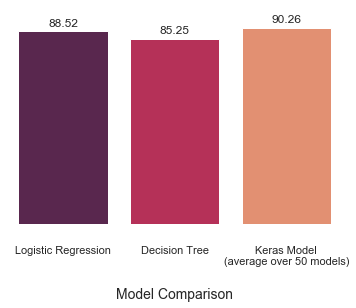

In [123]:
x_axis = ['\nLogistic Regression', '\nDecision Tree', '\nKeras Model\n(average over 50 models)']
y_axis = [100 - 100*y_1, 100 - 100*y_2, 100 - 100*mean_test]

plots = sns.barplot(x = x_axis, y = y_axis, palette = "rocket")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha = 'center', va = 'center', size = 12, xytext=(0, 8), textcoords='offset points')
sns.despine(left = True, bottom = True)
sns.set_theme(style = "white")
plt.tick_params(labelleft=False, left=False)
plt.ylim([0, 100])
plt.xlabel("\nModel Comparison", fontsize = 14)
plt.show()

**Observation:** <br><br>
Keras Model is well optimised. 

___